# Analyse et Modélisation de la Rétention des Avis Clients dans le Domaine du Commerce Électronique : Une Approche par Régression Logistique et Évaluation Approfondie des Performances

Lien pour telecharger le jeu de données : 
https://www.kaggle.com/datasets/swathiunnikrishnan/amazon-consumer-behaviour-dataset

## Importation des bibliothèques nécessaires et chargement de jeu de données "Amazon Customer behavior Survery" : 

In [612]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
import scipy.stats as stats
import warnings
from itertools import combinations
from scipy.stats import chi2_contingency
import pandas as pd
from sklearn.feature_selection import chi2, SelectKBest
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import statsmodels.api as sm
warnings.filterwarnings('ignore')


In [613]:
data  = pd.read_csv("C:\\Users\\amine\\Desktop\\educations\\projects\\Logistic Regression\\Amazon Customer Behavior Survey\\dataset\\Amazon Customer Behavior Survey.csv")

## Analyse éxploratoire de données : 


### Aperçu des données :

In [614]:
# Affichage des données : 
data

,Timestamp,age,Gender,Purchase_Frequency,Purchase_Categories,Personalized_Recommendation_Frequency,Browsing_Frequency,Product_Search_Method,Search_Result_Exploration,Customer_Reviews_Importance,...,Saveforlater_Frequency,Review_Left,Review_Reliability,Review_Helpfulness,Personalized_Recommendation_Frequency,Recommendation_Helpfulness,Rating_Accuracy,Shopping_Satisfaction,Service_Appreciation,Improvement_Areas
0,2023/06/04 1:28:19 PM GMT+5:30,23,Female,Few times a month,Beauty and Personal Care,Yes,Few times a week,Keyword,Multiple pages,1,...,Sometimes,Yes,Occasionally,Yes,2,Yes,1,1,Competitive prices,Reducing packaging waste
1,2023/06/04 2:30:44 PM GMT+5:30,23,Female,Once a month,Clothing and Fashion,Yes,Few times a month,Keyword,Multiple pages,1,...,Rarely,No,Heavily,Yes,2,Sometimes,3,2,Wide product selection,Reducing packaging waste
2,2023/06/04 5:04:56 PM GMT+5:30,24,Prefer not to say,Few times a month,Groceries and Gourmet Food;Clothing and Fashion,No,Few times a month,Keyword,Multiple pages,2,...,Rarely,No,Occasionally,No,4,No,3,3,Competitive prices,Product quality and accuracy
3,2023/06/04 5:13:00 PM GMT+5:30,24,Female,Once a month,Beauty and Personal Care;Clothing and Fashion;...,Sometimes,Few times a month,Keyword,First page,5,...,Sometimes,Yes,Heavily,Yes,3,Sometimes,3,4,Competitive prices,Product quality and accuracy
4,2023/06/04 5:28:06 PM GMT+5:30,22,Female,Less than once a month,Beauty and Personal Care;Clothing and Fashion,Yes,Few times a month,Filter,Multiple pages,1,...,Rarely,No,Heavily,Yes,4,Yes,2,2,Competitive prices,Product quality and accuracy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
597,2023/06/12 4:02:02 PM GMT+5:30,23,Female,Once a week,Beauty and Personal Care,Sometimes,Few times a week,categories,Multiple pages,4,...,Sometimes,Yes,Moderately,Sometimes,3,Sometimes,3,4,Competitive prices,Customer service responsiveness
598,2023/06/12 4:02:53 PM GMT+5:30,23,Female,Once a week,Clothing and Fashion,Sometimes,Few times a week,Filter,Multiple pages,3,...,Sometimes,Yes,Heavily,Sometimes,3,Sometimes,3,3,Product recommendations,Reducing packaging waste
599,2023/06/12 4:03:59 PM GMT+5:30,23,Female,Once a month,Beauty and Personal Care,Sometimes,Few times a week,categories,Multiple pages,3,...,Sometimes,Yes,Occasionally,Sometimes,3,Sometimes,2,3,Wide product selection,Product quality and accuracy
600,2023/06/12 9:57:20 PM GMT+5:30,23,Female,Few times a month,Beauty and Personal Care;Clothing and Fashion;...,Yes,Few times a month,Keyword,Multiple pages,1,...,Sometimes,No,Heavily,Yes,2,Yes,2,2,Wide product selection,Product quality and accuracy


In [615]:
#Renommer la colonne 'Personalized_Recommendation_Frequency' 
#en 'Personalized_Recommendation_Frequency_Nominale' dans les données.
data.rename(columns={'Personalized_Recommendation_Frequency':
                     'Personalized_Recommendation_Frequency_Nominale '},inplace=True)


In [616]:
# Affichages des informations des varibales : 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 602 entries, 0 to 601
Data columns (total 23 columns):
 #   Column                                           Non-Null Count  Dtype 
---  ------                                           --------------  ----- 
 0   Timestamp                                        602 non-null    object
 1   age                                              602 non-null    int64 
 2   Gender                                           602 non-null    object
 3   Purchase_Frequency                               602 non-null    object
 4   Purchase_Categories                              602 non-null    object
 5   Personalized_Recommendation_Frequency_Nominale   602 non-null    object
 6   Browsing_Frequency                               602 non-null    object
 7   Product_Search_Method                            600 non-null    object
 8   Search_Result_Exploration                        602 non-null    object
 9   Customer_Reviews_Importance                

In [617]:
# Affichages des colonnes : 
data.columns 

Index(['Timestamp', 'age', 'Gender', 'Purchase_Frequency',
       'Purchase_Categories',
       'Personalized_Recommendation_Frequency_Nominale ', 'Browsing_Frequency',
       'Product_Search_Method', 'Search_Result_Exploration',
       'Customer_Reviews_Importance', 'Add_to_Cart_Browsing',
       'Cart_Completion_Frequency', 'Cart_Abandonment_Factors',
       'Saveforlater_Frequency', 'Review_Left', 'Review_Reliability',
       'Review_Helpfulness', 'Personalized_Recommendation_Frequency ',
       'Recommendation_Helpfulness', 'Rating_Accuracy ',
       'Shopping_Satisfaction', 'Service_Appreciation', 'Improvement_Areas'],
      dtype='object')

à  propos des données  : 

1. age = âge
2. gender = genre
3. Purchase_Frequency = How frequently do you make purchases on Amazon? (À quelle fréquence effectuez-vous des achats sur Amazon ?)
4. Purchase_Categories = What product categories do you typically purchase on Amazon? (Dans quelles catégories de produits achetez-vous généralement sur Amazon ?)
5. Personalized_Recommendation_Frequency = Have you ever made a purchase based on personalized product recommendations from Amazon? (Avez-vous déjà effectué un achat basé sur des recommandations de produits personnalisées d'Amazon ?)
6. Browsing_Frequency = How often do you browse Amazon's website or app? (À quelle fréquence parcourez-vous le site web ou l'application d'Amazon ?)
7. Product_Search_Method = How do you search for products on Amazon? (Comment recherchez-vous des produits sur Amazon ?)
8. Search_Result_Exploration = Do you tend to explore multiple pages of search results or focus on the first page? (Avez-vous tendance à explorer plusieurs pages de résultats de recherche ou à vous concentrer sur la première page ?)
9. Customer_Reviews_Importance = How important are customer reviews in your decision-making process? (Dans quelle mesure les avis des clients sont-ils importants dans votre processus de prise de décision ?)
10. Add_to_Cart_Browsing = Do you add products to your cart while browsing on Amazon? (Ajoutez-vous des produits à votre panier tout en naviguant sur Amazon ?)
11. Cart_Completion_Frequency = How often do you complete the purchase after adding products to your cart? (À quelle fréquence finalisez-vous un achat après avoir ajouté des produits à votre panier ?)
12. Cart_Abandonment_Factors = What factors influence your decision to abandon a purchase in your cart? (Quels facteurs influencent votre décision d'abandonner un achat dans votre panier ?)
13. Saveforlater_Frequency = Do you use Amazon's "Save for Later" feature, and if so, how often? (Utilisez-vous la fonction "Enregistrer pour plus tard" d'Amazon, et si oui, à quelle fréquence ?)
14. Review_Left = Have you ever left a product review on Amazon? (Avez-vous déjà laissé un avis sur un produit sur Amazon ?)
15. Review_Reliability = How much do you rely on product reviews when making a purchase? (Dans quelle mesure faites-vous confiance aux avis sur les produits lorsque vous effectuez un achat ?)
16. Review_Helpfulness = Do you find helpful information from other customers' reviews? (Trouvez-vous des informations utiles dans les avis des autres clients ?)
17. Personalized_Recommendation_Frequency = How often do you receive personalized product recommendations from Amazon? (À quelle fréquence recevez-vous des recommandations de produits personnalisées d'Amazon ?)
18. Recommendation_Helpfulness = Do you find the recommendations helpful? (Trouvez-vous les recommandations utiles ?)
19. Rating_Accuracy = How would you rate the relevance and accuracy of the recommendations you receive (Comment évalueriez-vous la pertinence et la précision des recommandations que vous recevez ?)
20. Shopping_Satisfaction = How satisfied are you with your overall shopping experience on Amazon? (Dans quelle mesure êtes-vous satisfait de votre expérience d'achat globale sur Amazon ?)
23. Service_Appreciation = What aspects of Amazon's services do you appreciate the most? (Quels aspects des services d'Amazon appréciez-vous le plus ?)
24. Improvement_Areas = Are there any areas where you think Amazon can improve? (Y a-t-il des domaines où vous pensez qu'Amazon pourrait s'améliorer ?)
25. Timestamp = Time and date at which the data was entered (Heure et date à laquelle les données ont été saisies) 


### Statistiques descriptives :  

In [618]:
data.describe()

,age,Customer_Reviews_Importance,Personalized_Recommendation_Frequency,Rating_Accuracy,Shopping_Satisfaction
count,602.000000,602.000000,602.000000,602.000000,602.000000
mean,30.790698,2.480066,2.699336,2.672757,2.463455
std,10.193276,1.185226,1.042028,0.899744,1.012152
min,3.000000,1.000000,1.000000,1.000000,1.000000
25%,23.000000,1.000000,2.000000,2.000000,2.000000
50%,26.000000,3.000000,3.000000,3.000000,2.000000
75%,36.000000,3.000000,3.000000,3.000000,3.000000
max,67.000000,5.000000,5.000000,5.000000,5.000000


**Interprétation des statistiques descriptives pour les variables : `age`, `Customer_Reviews_Importance`, `Personalized_Recommendation_Frequency`, `Rating_Accuracy`, et `Shopping_Satisfaction` :**

1. **`age`** :
   - Comptage (count) : Il y a 602 observations pour l'âge, couvrant 602 clients.
   - Moyenne (mean) : L'âge moyen des clients est d'environ 30.79 ans.
   - Écart-type (std) : L'écart-type de 10.19 indique que l'âge des clients varie considérablement autour de la moyenne.
   - Minimum (min) : L'âge minimum est de 3 ans, ce qui semble inhabituellement bas et nécessite une vérification de la qualité des données.
   - Maximum (max) : L'âge maximum est de 67 ans, ce qui semble raisonnable.
   - Quartiles (25%, 50%, 75%) : Les quartiles révèlent la répartition de l'âge. Par exemple, au 25e percentile (Q1), l'âge est d'environ 23 ans, tandis qu'au 75e percentile (Q3), il est d'environ 36 ans. La médiane (50e percentile) est de 26 ans.

2. **`Customer_Reviews_Importance`**, **`Personalized_Recommendation_Frequency`**, **`Rating_Accuracy`**, et **`Shopping_Satisfaction`** :
   - Comptage (count) : Il y a 602 observations pour chacune de ces variables.
   - Moyenne (mean) : La moyenne pour chaque variable représente la valeur moyenne donnée par les clients sur une échelle de 1 à 5.
   - Écart-type (std) : L'écart-type mesure la dispersion des réponses des clients par rapport à la moyenne.
   - Minimum (min) : Le minimum est de 1 pour chacune de ces variables, indiquant que 1 est la note minimale possible.
   - Maximum (max) : Le maximum est de 5 pour chacune de ces variables, indiquant que 5 est la note maximale possible.
   - Quartiles (25%, 50%, 75%) : Les quartiles montrent la répartition des réponses des clients pour chaque variable.

Ces statistiques offrent un aperçu des caractéristiques des variables et de leur distribution. Par exemple, pour `age`, nous observons une large dispersion d'âges, de 3 à 67 ans, avec une moyenne d'environ 30.79 ans. Pour les autres variables, les évaluations varient de 1 à 5, avec des moyennes spécifiques et des niveaux de dispersion distincts. Ces informations sont utiles pour mieux comprendre les données et orienter les décisions relatives à la segmentation des clients ou à d'autres analyses ultérieures.

In [621]:
data.drop(data[data['age'] == 3].index, axis=0, inplace=True)

### Distributions des variables  : 

Quelle est la répartition de l'âge des clients et quel est l'âge moyen ?

In [622]:
# comptes des valeurs unique de variable age : 
data['age'].value_counts()

age
23    123
34     48
24     40
25     36
45     34
21     30
26     27
32     19
27     17
22     17
36     16
35     15
37     14
40     12
46     12
29      9
31      9
28      9
30      8
56      8
33      7
18      7
47      6
54      6
43      6
50      5
44      5
20      5
16      5
38      4
41      4
19      4
39      4
17      4
42      4
48      3
60      3
67      2
15      2
57      2
53      2
64      1
58      1
49      1
63      1
52      1
55      1
62      1
12      1
Name: count, dtype: int64

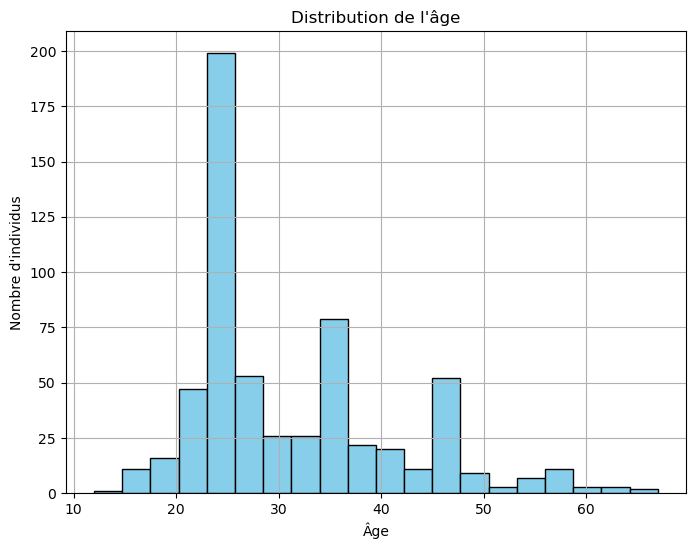

In [623]:
# vizualisation de la distribution de l'age : 
plt.figure(figsize=(8,6))
plt.hist(data['age'],bins=20,color='skyblue',edgecolor='black')
plt.title('Distribution de l\'âge')
plt.xlabel('Âge')
plt.ylabel('Nombre d\'individus')
plt.grid(True)
path_to_save = 'C:\\Users\\amine\\Desktop\\educations\\projects\\Logistic Regression\\Amazon Customer Behavior Survey\\graphe et image de projet\\1 Distribution de l\'âge.png'  # Remplacez par le chemin et le nom de fichier souhaités

# Enregistrez l'image à l'emplacement spécifié
plt.savefig(path_to_save)
plt.show()


La répartition des âges des clients dans notre jeu de données est la suivante :

- L'âge le plus fréquent est de 23 ans, avec 123 individus.
- L'âge le moins fréquent est de 64 ans, avec seulement 1 individu.
- Plusieurs autres âges ont un nombre relativement élevé d'individus, tels que 34 ans (48 individus), 24 ans (40 individus) et 25 ans (36 individus).

D'après le tableau de la statistique descriptive, l'âge moyen est de 30 ans.

**Quelle est la répartition des genres des clients (homme, femme, autre) ?**

In [625]:
data['Gender'].value_counts()

Gender
Female               352
Male                 142
Prefer not to say     88
Others                19
Name: count, dtype: int64

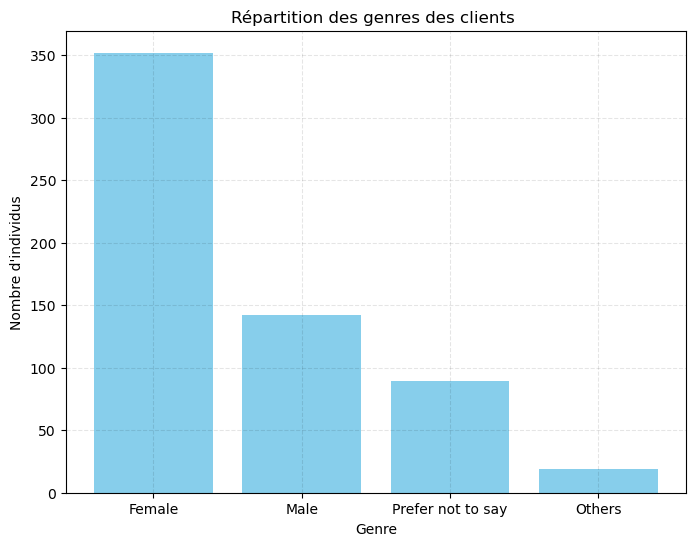

In [626]:
Gender_Frequency = [352,142,89,19]
Genre = ['Female','Male','Prefer not to say','Others']
plt.figure(figsize=(8,6))
plt.bar(Genre,Gender_Frequency,color='skyblue')
plt.title('Répartition des genres des clients ')
plt.xlabel("Genre")
plt.ylabel("Nombre d\'individus")
plt.grid(True,linestyle='--',color='black',alpha=0.1)
path_to_save = 'C:\\Users\\amine\\Desktop\\educations\\projects\\Logistic Regression\\Amazon Customer Behavior Survey\\graphe et image de projet\\2 Répartition des genres des clients.png'  # Remplacez par le chemin et le nom de fichier souhaités

# Enregistrez l'image à l'emplacement spécifié
plt.savefig(path_to_save)
plt.show()

D'après le graphique à barres, voici l'interprétation des données :

- **Femmes** : Il y a plus de clientes féminines que toute autre catégorie. Cela pourrait indiquer que les produits ou services offerts sont plus populaires ou plus ciblés vers les femmes.
- **Hommes** : Le nombre de clients masculins est inférieur à celui des femmes, mais reste une part importante de la clientèle.
- **Préfère ne pas dire** : Un certain nombre de clients ont choisi de ne pas divulguer leur genre. Cela pourrait indiquer une préférence pour la confidentialité ou l'anonymat.
- **Autres** : Il y a moins de clients qui s'identifient comme "autres". Cela pourrait inclure une variété de genres non binaires ou non conformes.

la répartition des genres des clients est donc dominée par les femmes, suivies des hommes, avec un nombre plus petit de clients qui préfèrent ne pas divulguer leur genre ou qui s'identifient comme "autres". Cette information pourrait être utile pour comprendre le profil démographique de notre clientèle et pour élaborer des stratégies de marketing ciblées.

**À quelle fréquence les clients effectuent-ils des achats sur Amazon ?**

In [627]:
data['Purchase_Frequency'].value_counts()

Purchase_Frequency
Few times a month         203
Less than once a month    124
Once a week               112
Once a month              106
Multiple times a week      56
Name: count, dtype: int64

Certainly! Here are 10 other color palettes that you can consider using in Seaborn:

'deep'
'muted'
'colorblind'
'husl'
'pastel'
'dark'
'RdBu_r'
'cubehelix'
'Set2'
'Paired'

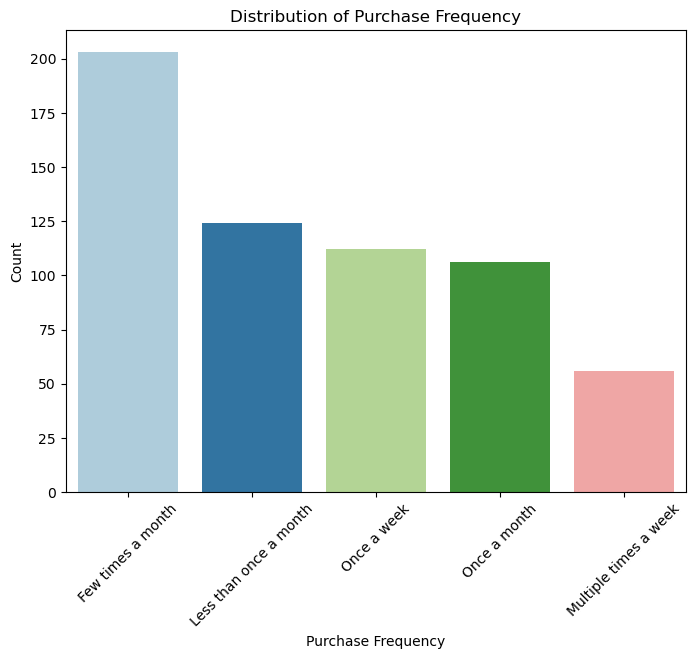

In [628]:
# Count the occurrences of each category
purchase_frequency_counts = data['Purchase_Frequency'].value_counts()

# Create a bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x=purchase_frequency_counts.index, y=purchase_frequency_counts.values, palette='Paired')

# Add labels and title
plt.xlabel('Purchase Frequency')
plt.ylabel('Count')
plt.title('Distribution of Purchase Frequency')
plt.xticks(rotation=45)
path_to_save = 'C:\\Users\\amine\\Desktop\\educations\\projects\\Logistic Regression\\Amazon Customer Behavior Survey\\graphe et image de projet\\3 Distribution of Purchase Frequency.png'  # Remplacez par le chemin et le nom de fichier souhaités

# Enregistrez l'image à l'emplacement spécifié
plt.savefig(path_to_save)
# Show the plot
plt.show()


D'après le graphique à barres :

- **Une fois par mois** : C'est la fréquence d'achat la plus courante parmi les clients, avec environ 175 personnes effectuant des achats mensuels. Cela pourrait indiquer que la majorité des clients utilisent Amazon pour des achats réguliers ou planifiés.

- **2-3 fois par mois** : Un nombre significatif de clients achète 2 à 3 fois par mois. Ces clients pourraient être ceux qui effectuent des achats plus fréquents ou qui utilisent Amazon pour des besoins variés.

- **Une fois par semaine** : Un nombre plus restreint de clients effectue des achats une fois par semaine. Ces clients pourraient être ceux qui dépendent fortement d'Amazon pour leurs achats hebdomadaires.

- **2-3 fois par semaine** : Très peu de clients achètent 2 à 3 fois par semaine. Ces clients pourraient être ceux qui font des achats fréquents ou qui dépendent fortement d'Amazon pour leurs besoins quotidiens.

- **4+ fois par semaine** : Le nombre de clients qui achètent 4 fois ou plus par semaine est le plus bas, avec environ 25 personnes. Ces clients pourraient être ceux qui utilisent Amazon pour une grande variété de besoins ou qui effectuent des achats fréquents.

La majorité des clients effectuent des achats sur Amazon une fois par mois, suivis de ceux qui achètent 2 à 3 fois par mois. Un nombre plus restreint de clients effectue des achats une fois par semaine ou plus. Cette information pourrait être utile pour comprendre les habitudes d'achat de notre clientèle et élaborer des stratégies de marketing ciblées.

**Quelles catégories de produits sont les plus populaires parmi les clients d'Amazon ?**

In [231]:
data['Purchase_Categories'].unique()

array(['Beauty and Personal Care', 'Clothing and Fashion',
       'Groceries and Gourmet Food;Clothing and Fashion',
       'Beauty and Personal Care;Clothing and Fashion;others',
       'Beauty and Personal Care;Clothing and Fashion',
       'Beauty and Personal Care;Clothing and Fashion;Home and Kitchen',
       'Clothing and Fashion;Home and Kitchen', 'others',
       'Clothing and Fashion;others',
       'Beauty and Personal Care;Home and Kitchen',
       'Groceries and Gourmet Food',
       'Groceries and Gourmet Food;Clothing and Fashion;others',
       'Groceries and Gourmet Food;Beauty and Personal Care;Clothing and Fashion;Home and Kitchen',
       'Groceries and Gourmet Food;Beauty and Personal Care;Clothing and Fashion;Home and Kitchen;others',
       'Home and Kitchen', 'Beauty and Personal Care;others',
       'Beauty and Personal Care;Home and Kitchen;others',
       'Home and Kitchen;others',
       'Groceries and Gourmet Food;Home and Kitchen',
       'Beauty and Person

**Remarque :** Il est à noter que les catégories semblent être correctement répertoriées dans les données, cependant, certaines d'entre elles sont des combinaisons de plusieurs catégories. Cette observation suggère la présence de catégories d'achat multiples ou de regroupements de produits au sein de l'échantillon, ce qui peut fournir des informations précieuses sur les préférences d'achat des clients.

On va faire des étapes pour résoudre ce problème : 

In [301]:
# étape 1 (Netoyage des categories ) : 
#Pour garantir que toutes les catégories sont uniformes, sans espaces supplémentaires et en lettres minuscules. 
data['Purchase_Categories'] = data['Purchase_Categories'].str.strip().str.lower()

In [302]:
# étape 2 création d'une dataFrame de categorie et counts 
category_counts = data['Purchase_Categories'].value_counts()
df = category_counts.reset_index()
df.columns = ['Category','Counts']
print(df)

                                             Category  Counts
0                            beauty and personal care     106
1                                clothing and fashion     106
2                                              others      48
3       beauty and personal care;clothing and fashion      46
4   beauty and personal care;clothing and fashion;...      42
5   groceries and gourmet food;beauty and personal...      32
6               clothing and fashion;home and kitchen      27
7                                    home and kitchen      24
8           beauty and personal care;home and kitchen      21
9        clothing and fashion;home and kitchen;others      16
10                        clothing and fashion;others      14
11                         groceries and gourmet food      14
12  groceries and gourmet food;beauty and personal...      14
13  beauty and personal care;clothing and fashion;...      12
14  groceries and gourmet food;beauty and personal...      10
15      

In [303]:
# étape 3 determination de categorie unique (sans combinaison )
unique_categories = []
categories =df['Category'].unique()
# Parcourir chaque catégorie dans la liste initiale
for category in categories:
    # Diviser la catégorie en sous-catégories en utilisant ';' comme séparateur
    sub_categories = category.split(';')
    
    # Parcourir chaque sous-catégorie
    for sub_category in sub_categories:
        # Si la sous-catégorie n'est pas déjà dans la liste des catégories uniques, l'ajouter
        if sub_category not in unique_categories:
            unique_categories.append(sub_category)

# Afficher la liste des catégories uniques
print(unique_categories)


['beauty and personal care', 'clothing and fashion', 'others', 'home and kitchen', 'groceries and gourmet food']


In [305]:
# étape 4 calcule de comptage de chaque categorie unique : 
unique_categories = ['beauty and personal care', 'clothing and fashion', 'others', 'home and kitchen', 'groceries and gourmet food']

# Initialiser un dictionnaire pour stocker les sommes des Counts
sum_counts_dict = {}

# Parcourir chaque catégorie dans la liste unique_categories
for category in unique_categories:
    # Filtrer les lignes où la catégorie contient la catégorie actuelle
    category_df = df[df['Category'].str.contains(category)]
    
    # Calculer la somme des Counts pour ces lignes
    sum_counts = category_df['Counts'].sum()
    
    # Ajouter la somme des Counts à la catégorie correspondante dans le dictionnaire
    sum_counts_dict[category] = sum_counts

In [306]:
# finalement, on trouve le résultats : 
# Convertir le dictionnaire en DataFrame
df_counts = pd.DataFrame(list(sum_counts_dict.items()), columns=['Category', 'Counts'])

# Afficher le DataFrame
df_counts


,Category,Counts
0,beauty and personal care,318
1,clothing and fashion,343
2,others,166
3,home and kitchen,220
4,groceries and gourmet food,111


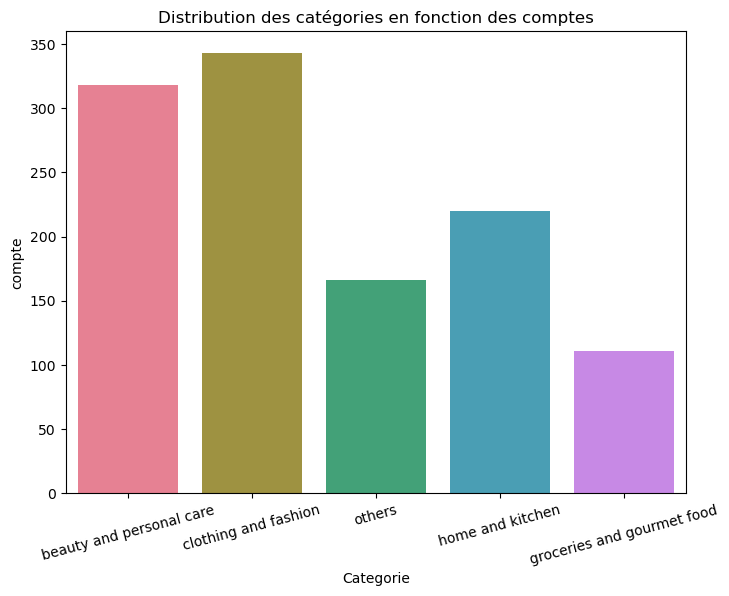

In [400]:
plt.figure(figsize=(8,6))
sns.barplot(x=df_counts['Category'],y=df_counts['Counts'],palette='husl')
plt.title('Distribution des catégories en fonction des comptes')
plt.xlabel('Categorie')
plt.ylabel('compte')
plt.xticks(rotation=15)
path_to_save = 'C:\\Users\\amine\\Desktop\\educations\\projects\\Logistic Regression\\Amazon Customer Behavior Survey\\graphe et image de projet\\4 Distribution des catégories en fonction des comptes.png'  # Remplacez par le chemin et le nom de fichier souhaités

# Enregistrez l'image à l'emplacement spécifié
plt.savefig(path_to_save)
plt.show()


D'après le graphique à barres:

- **Beauté et soins personnels** : Cette catégorie a le plus grand nombre de comptes associés, ce qui indique qu'elle est la plus populaire parmi les clients d'Amazon. Les produits de beauté et de soins personnels sont souvent achetés en ligne pour leur commodité et leur variété.
- **Vêtements et mode** : Cette catégorie est la deuxième plus populaire parmi les clients d'Amazon. Cela pourrait indiquer que les clients apprécient la large sélection de vêtements et d'accessoires de mode disponibles sur Amazon.
- **Maison et cuisine** : Cette catégorie est également populaire parmi les clients d'Amazon, avec un nombre significatif de comptes associés. Cela pourrait indiquer que les clients apprécient la commodité d'acheter des articles ménagers et de cuisine en ligne.
- **Épicerie et gastronomie** : Cette catégorie a le moins de comptes associés, ce qui pourrait indiquer que moins de clients achètent des produits d'épicerie et gastronomiques sur Amazon par rapport aux autres catégories.

Les catégories de produits les plus populaires parmi les clients d'Amazon sont la beauté et les soins personnels, les vêtements et la mode, et la maison et la cuisine.

conclusion sur les 3 images précidentes :
    

1. **Genre des clients** : La première image montre que la majorité des clients sont des femmes. Cela pourrait influencer les types de produits qui sont les plus populaires, comme le montre la troisième image.

2. **Fréquence d'achat** : La deuxième image montre que la plupart des clients achètent une fois par mois. Cela pourrait indiquer que les clients préfèrent acheter en gros ou planifier leurs achats, ce qui pourrait également influencer les types de produits qu'ils achètent.

3. **Catégories de produits populaires** : La troisième image montre que les catégories de produits les plus populaires sont la beauté et les soins personnels, les vêtements et la mode, et la maison et la cuisine. Cela pourrait être lié au genre des clients (plus de femmes) et à leur fréquence d'achat (une fois par mois).

En combinant ces informations, on pourrait dire que les femmes qui achètent une fois par mois sont susceptibles d'acheter des produits de beauté et de soins personnels, des vêtements et de la mode, et des articles pour la maison et la cuisine. Cependant, pour confirmer ces relations, une analyse plus approfondie serait nécessaire, comme une analyse de corrélation ou une analyse de régression.

 **À quelle fréquence les clients parcourent-ils le site web ou l'application d'Amazon ?**

In [318]:
data['Browsing_Frequency'].value_counts()

Browsing_Frequency
Few times a week        249
Few times a month       199
Rarely                   77
Multiple times a day     77
Name: count, dtype: int64

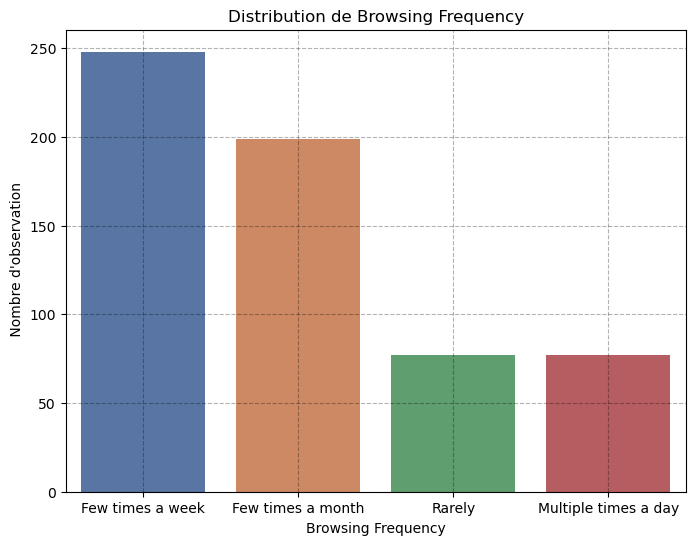

In [402]:
data_B_F = data['Browsing_Frequency'].value_counts()
plt.figure(figsize=(8,6))
sns.barplot(x=data_B_F.index,y=data_B_F,palette='deep')
plt.title('Distribution de Browsing Frequency')
plt.xlabel('Browsing Frequency')
plt.ylabel(' Nombre d\'observation')
plt.grid(True,color='black',linestyle='--',alpha=0.3)
path_to_save = 'C:\\Users\\amine\\Desktop\\educations\\projects\\Logistic Regression\\Amazon Customer Behavior Survey\\graphe et image de projet\\6 Distribution de Browsing Frequency.png'  # Remplacez par le chemin et le nom de fichier souhaités

# Enregistrez l'image à l'emplacement spécifié
plt.savefig(path_to_save)
plt.show()

D'après le graphique à barres: 

- **Quelques fois par semaine** : La majorité des clients, représentés par la barre bleue la plus haute, parcourent le site web ou l'application d'Amazon quelques fois par semaine. Cela pourrait indiquer que ces clients utilisent régulièrement Amazon pour parcourir les produits, lire les critiques, comparer les prix, etc.
- **Quelques fois par mois** : Un nombre significatif de clients, représentés par la barre orange, parcourent le site web ou l'application d'Amazon quelques fois par mois. Cela pourrait indiquer que ces clients utilisent Amazon moins fréquemment, peut-être pour des achats planifiés ou occasionnels.
- **Plusieurs fois par jour** : Un nombre plus petit de clients, représentés par la barre verte, parcourent le site web ou l'application d'Amazon plusieurs fois par jour. Ces clients pourraient être ceux qui dépendent fortement d'Amazon pour leurs besoins quotidiens ou qui font des achats fréquents.
- **Rarement** : Le nombre de clients qui parcourent rarement le site web ou l'application d'Amazon, représentés par la barre rouge, est le plus bas. Ces clients pourraient être ceux qui utilisent Amazon très occasionnellement ou qui préfèrent d'autres méthodes d'achat.

La majorité des clients parcourent le site web ou l'application d'Amazon quelques fois par semaine, suivis de ceux qui le font quelques fois par mois. Un nombre plus petit de clients le font plusieurs fois par jour ou rarement.

La fréquence de navigation pourrait être liée à la fréquence d'achat (deuxième image) et à l'utilisation des recommandations de produits personnalisées (quatrième image). Par exemple, les clients qui parcourent le site plusieurs fois par jour pourraient être plus susceptibles d'acheter fréquemment et d'utiliser des recommandations de produits personnalisées. Cependant, pour confirmer ces relations, une analyse plus approfondie serait nécessaire.

**Comment les clients recherchent-ils des produits sur Amazon, et quel est le moyen le plus courant de recherche ?**

In [328]:
data['Product_Search_Method'].value_counts()

Product_Search_Method
categories    223
Keyword       214
Filter        127
others         36
Name: count, dtype: int64

In [329]:
# vérifié s'il y a des valeurs manquantes dans cette colonnes : 
data['Product_Search_Method'].isna().sum()

2

In [330]:
mode_value = data['Product_Search_Method'].mode()[0]
data['Product_Search_Method'] = data['Product_Search_Method'].fillna(mode_value)

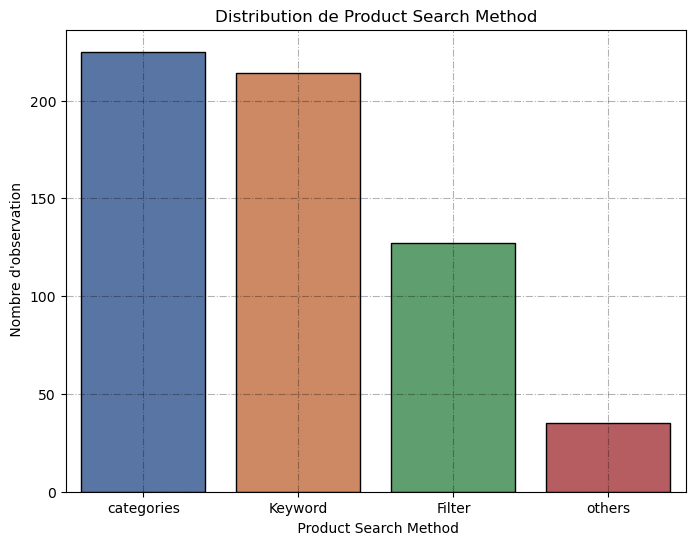

In [403]:
data_S_M =data['Product_Search_Method'].value_counts()
plt.figure(figsize=(8,6))
sns.barplot(x=data_S_M.index,y=data_S_M,palette='deep',edgecolor='black')
plt.title('Distribution de Product Search Method')
plt.xlabel(' Product Search Method')
plt.ylabel(' Nombre d\'observation')
plt.grid(True,linestyle='dashdot',color='black',alpha=0.3)
path_to_save = 'C:\\Users\\amine\\Desktop\\educations\\projects\\Logistic Regression\\Amazon Customer Behavior Survey\\graphe et image de projet\\7 Distribution de Product Search Method.png'  # Remplacez par le chemin et le nom de fichier souhaités

# Enregistrez l'image à l'emplacement spécifié
plt.savefig(path_to_save)
plt.show()

D'après le graphique à barres :

- **Mots-clés** : La majorité des clients, représentés par la barre bleue la plus haute, recherchent des produits en utilisant des mots-clés. Cela pourrait indiquer que ces clients ont une idée précise de ce qu'ils cherchent et utilisent des mots-clés pour trouver rapidement et efficacement le produit souhaité.
- **Catégories** : Un nombre significatif de clients, représentés par la barre orange, recherchent des produits en naviguant dans les catégories. Cela pourrait indiquer que ces clients préfèrent explorer une variété de produits dans une certaine catégorie avant de faire un choix.
- **Filtres** : Un nombre plus petit de clients, représentés par la barre verte, utilisent des filtres pour rechercher des produits. Ces clients pourraient être ceux qui ont des critères spécifiques pour les produits qu'ils recherchent, comme la gamme de prix, la marque, la note des clients, etc.
- **Autres** : Le nombre de clients qui utilisent d'autres méthodes pour rechercher des produits, représentés par la barre rouge, est le plus bas. Ces méthodes pourraient inclure des choses comme la navigation aléatoire, l'utilisation de recommandations de produits personnalisées, etc.

La majorité des clients recherchent des produits sur Amazon en utilisant des mots-clés, suivis de ceux qui naviguent dans les catégories. Un nombre plus petit de clients utilise des filtres ou d'autres méthodes pour rechercher des produits.

La méthode de recherche de produits pourrait être liée à la fréquence de navigation (cinquième image) et à l'utilisation des recommandations de produits personnalisées (quatrième image). Par exemple, les clients qui parcourent le site plusieurs fois par jour pourraient être plus susceptibles d'utiliser des mots-clés pour rechercher des produits, tandis que ceux qui le font moins fréquemment pourraient être plus susceptibles de naviguer dans les catégories. Cependant, pour confirmer ces relations, une analyse plus approfondie serait nécessaire.

**Les clients ont-ils tendance à explorer plusieurs pages de résultats de recherche ou à se concentrer sur la première page ?**

In [335]:
data_S_R_E=data['Search_Result_Exploration'].value_counts()

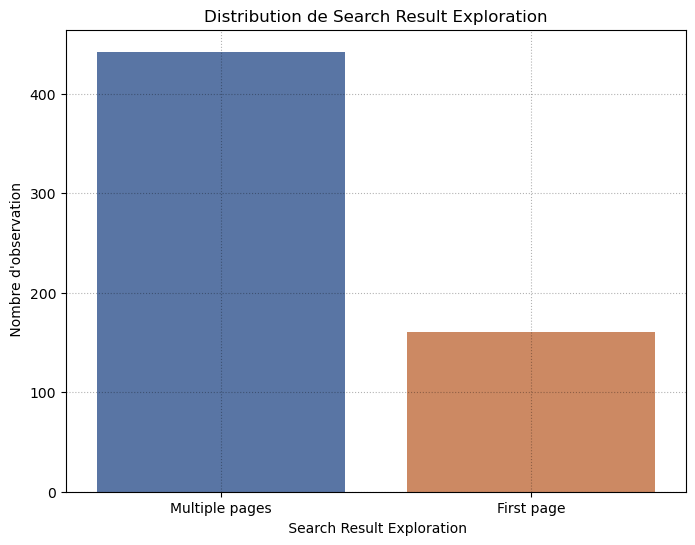

In [406]:
plt.figure(figsize=(8,6))
sns.barplot(x=data_S_R_E.index,y=data_S_R_E,palette='deep')
plt.title('Distribution de Search Result Exploration')
plt.xlabel(' Search Result Exploration')
plt.ylabel(' Nombre d\'observation')
plt.grid(True,linestyle=':',color='black',alpha=0.3)
path_to_save = 'C:\\Users\\amine\\Desktop\\educations\\projects\\Logistic Regression\\Amazon Customer Behavior Survey\\graphe et image de projet\\8 Distribution de Search Result Exploration.png'  # Remplacez par le chemin et le nom de fichier souhaités

# Enregistrez l'image à l'emplacement spécifié
plt.savefig(path_to_save)
plt.show()
plt.show()

D'après le graphique à barres :

- **Plusieurs pages** : La majorité des clients, représentés par la barre bleue la plus haute, ont tendance à explorer plusieurs pages de résultats de recherche. Cela pourrait indiquer que ces clients sont prêts à passer du temps à chercher le produit parfait et ne se limitent pas aux produits présentés sur la première page.
- **Première page** : Un nombre plus petit de clients, représentés par la barre orange, se concentrent sur la première page des résultats de recherche. Ces clients pourraient être ceux qui préfèrent faire des achats rapidement ou qui font confiance aux algorithmes d'Amazon pour présenter les meilleurs produits en premier.

La majorité des clients ont tendance à explorer plusieurs pages de résultats de recherche, tandis qu'un nombre plus petit de clients se concentre sur la première page.

L'exploration des résultats de recherche pourrait être liée à la méthode de recherche de produits (septième image) et à la fréquence de navigation (cinquième image). Par exemple, les clients qui utilisent des mots-clés pour rechercher des produits pourraient être plus susceptibles d'explorer plusieurs pages de résultats, tandis que ceux qui naviguent dans les catégories pourraient être plus susceptibles de se concentrer sur la première page. Cependant, pour confirmer ces relations, une analyse plus approfondie serait nécessaire.

**Dans quelle mesure les avis des clients sont-ils importants dans le processus de prise de décision des clients ?**

In [339]:
data_C_R_I = data['Customer_Reviews_Importance'].value_counts()

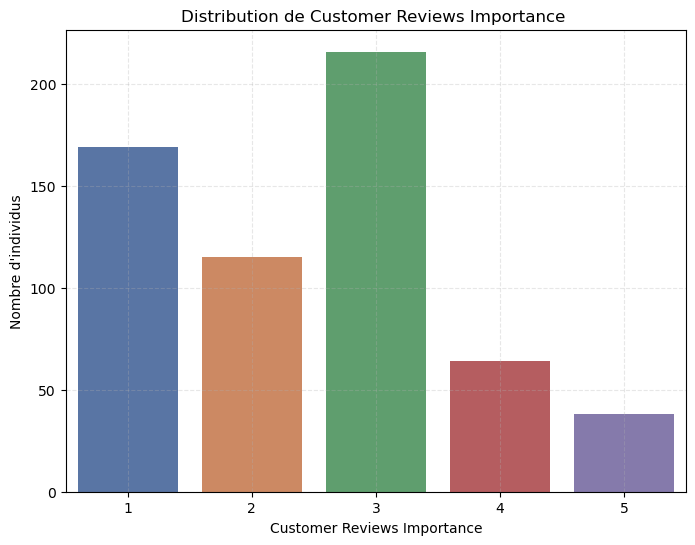

In [407]:
plt.figure(figsize = (8,6))
sns.barplot(x=data_C_R_I.index,y=data_C_R_I,palette='deep')
plt.title('Distribution de Customer Reviews Importance ')
plt.xlabel('Customer Reviews Importance')
plt.ylabel('Nombre d\'individus')
plt.grid(True,linestyle='--',alpha=0.3)
path_to_save = 'C:\\Users\\amine\\Desktop\\educations\\projects\\Logistic Regression\\Amazon Customer Behavior Survey\\graphe et image de projet\\9 Distribution de Customer Reviews Importance.png'  # Remplacez par le chemin et le nom de fichier souhaités

# Enregistrez l'image à l'emplacement spécifié
plt.savefig(path_to_save)
plt.show()

D'après le graphique à barres :

- **3 sur 5** : La majorité des clients, représentés par la barre la plus haute, ont évalué l'importance des avis des clients comme étant de 3 sur 5. Cela pourrait indiquer que ces clients considèrent les avis des clients comme modérément importants dans leur processus de prise de décision.
- **2 sur 5** : Un nombre significatif de clients, représentés par la deuxième barre la plus haute, ont évalué l'importance des avis des clients comme étant de 2 sur 5. Cela pourrait indiquer que ces clients considèrent les avis des clients comme étant d'une importance relativement faible dans leur processus de prise de décision.
- **1 sur 5** : Un nombre plus petit de clients, représentés par la troisième barre la plus haute, ont évalué l'importance des avis des clients comme étant de 1 sur 5. Ces clients pourraient être ceux qui ne considèrent pas les avis des clients comme importants dans leur processus de prise de décision.

La majorité des clients considèrent que les avis des clients sont modérément importants dans leur processus de prise de décision, tandis qu'un nombre significatif de clients les considèrent comme relativement peu importants.

L'importance des avis des clients pourrait être liée à la méthode de recherche de produits (septième image) et à l'exploration des résultats de recherche (huitième image). Par exemple, les clients qui utilisent des mots-clés pour rechercher des produits et qui explorent plusieurs pages de résultats pourraient être plus susceptibles de considérer les avis des clients comme importants dans leur processus de prise de décision. Cependant, pour confirmer ces relations, une analyse plus approfondie serait nécessaire.

**Combien de clients ajoutent des produits à leur panier tout en naviguant sur Amazon ?**

In [345]:
data_A_T_C_B = data['Add_to_Cart_Browsing'].value_counts()

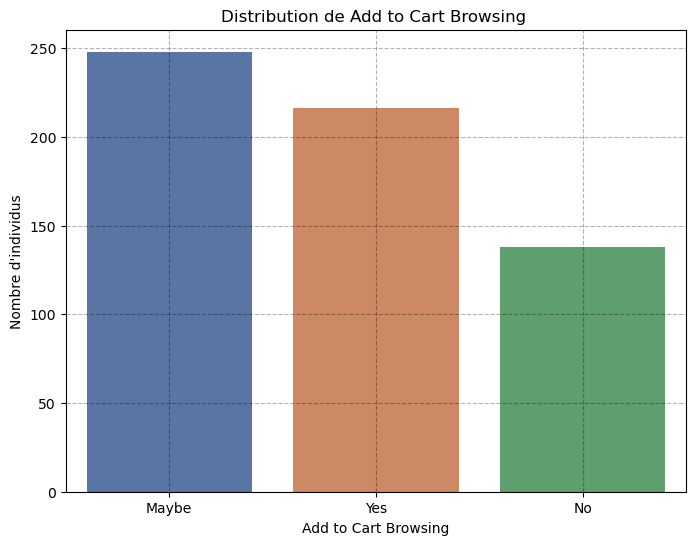

In [408]:
plt.figure(figsize = (8,6))
sns.barplot(x=data_A_T_C_B.index,y=data_A_T_C_B,palette='deep')
plt.title('Distribution de Add to Cart Browsing ')
plt.xlabel('Add to Cart Browsing')
plt.ylabel('Nombre d\'individus')
plt.grid(True,linestyle='--',color='black',alpha=0.3)
path_to_save = 'C:\\Users\\amine\\Desktop\\educations\\projects\\Logistic Regression\\Amazon Customer Behavior Survey\\graphe et image de projet\\10 Distribution de Add to Cart Browsing.png'  # Remplacez par le chemin et le nom de fichier souhaités

# Enregistrez l'image à l'emplacement spécifié
plt.savefig(path_to_save)
plt.show()

D'après le graphique à barres :

- **Peut-être** : La majorité des clients, représentés par la barre bleue la plus haute, ont répondu "Peut-être" à la question de savoir s'ils ajoutent des produits à leur panier tout en naviguant sur Amazon. Cela pourrait indiquer que ces clients sont incertains ou qu'ils ajoutent parfois des produits à leur panier pendant la navigation, en fonction de divers facteurs tels que le produit, le prix, les avis, etc.
- **Oui** : Un nombre significatif de clients, représentés par la barre orange, ont répondu "Oui". Cela pourrait indiquer que ces clients ont tendance à ajouter des produits à leur panier pendant la navigation, peut-être pour les sauvegarder pour un achat futur ou pour les comparer à d'autres produits.
- **Non** : Un nombre plus petit de clients, représentés par la barre verte, ont répondu "Non". Ces clients pourraient être ceux qui préfèrent naviguer et rechercher des produits sans les ajouter à leur panier.

La majorité des clients sont incertains quant à l'ajout de produits à leur panier tout en naviguant sur Amazon, tandis qu'un nombre significatif de clients le font et un nombre plus petit de clients ne le font pas.

L'ajout de produits au panier pendant la navigation pourrait être lié à la méthode de recherche de produits (septième image), à l'exploration des résultats de recherche (huitième image) et à l'importance des avis des clients (neuvième image). Par exemple, les clients qui utilisent des mots-clés pour rechercher des produits, qui explorent plusieurs pages de résultats et qui considèrent les avis des clients comme importants pourraient être plus susceptibles d'ajouter des produits à leur panier pendant la navigation. Cependant, pour confirmer ces relations, une analyse plus approfondie serait nécessaire.

**À quelle fréquence les clients finalisent-ils un achat après avoir ajouté des produits à leur panier ?**

In [349]:
data_C_C_F = data['Cart_Completion_Frequency'].value_counts()

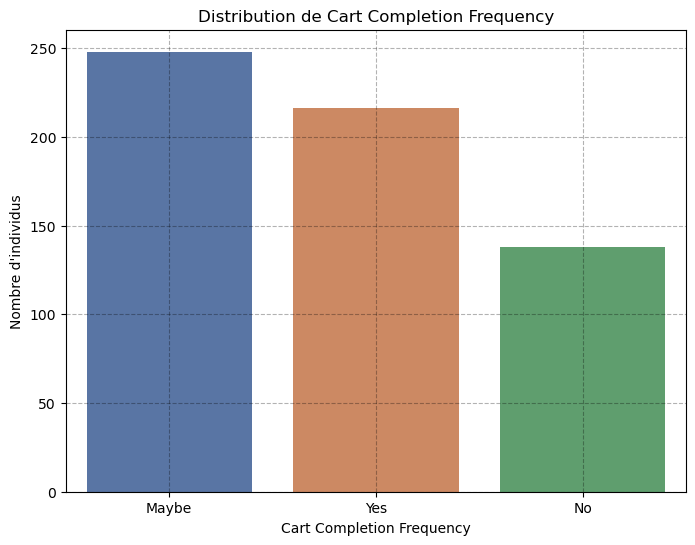

In [409]:
# vizualisation de la distribution de "Personalized Recommendation Frequency" : 
plt.figure(figsize=(8,6))
sns.barplot(x=data_A_T_C_B.index,y=data_A_T_C_B,palette='deep')
plt.title('Distribution de Cart Completion Frequency')
plt.xlabel('Cart Completion Frequency')
plt.ylabel('Nombre d\'individus')
plt.grid(True,linestyle='--',color='black',alpha=0.3)
path_to_save = 'C:\\Users\\amine\\Desktop\\educations\\projects\\Logistic Regression\\Amazon Customer Behavior Survey\\graphe et image de projet\\11 Distribution de Cart Completion Frequency.png'  # Remplacez par le chemin et le nom de fichier souhaités

# Enregistrez l'image à l'emplacement spécifié
plt.savefig(path_to_save)
plt.show()

D'après le graphique à barres:

- **Peut-être** : La majorité des clients, représentés par la barre bleue la plus haute, ont répondu "Peut-être" à la question de savoir s'ils finalisent un achat après avoir ajouté des produits à leur panier. Cela pourrait indiquer que ces clients sont incertains ou qu'ils finalisent parfois un achat après avoir ajouté des produits à leur panier, en fonction de divers facteurs tels que le produit, le prix, les avis, etc.
- **Oui** : Un nombre significatif de clients, représentés par la barre orange, ont répondu "Oui". Cela pourrait indiquer que ces clients ont tendance à finaliser un achat après avoir ajouté des produits à leur panier. Ces clients pourraient être ceux qui planifient leurs achats ou qui sont sûrs de ce qu'ils veulent.
- **Non** : Un nombre plus petit de clients, représentés par la barre verte, ont répondu "Non". Ces clients pourraient être ceux qui ajoutent des produits à leur panier pour les sauvegarder pour plus tard ou pour les comparer à d'autres produits, mais ne finalisent pas toujours l'achat.

La majorité des clients sont incertains quant à la finalisation d'un achat après avoir ajouté des produits à leur panier, tandis qu'un nombre significatif de clients le font et un nombre plus petit de clients ne le font pas.

La finalisation d'un achat après avoir ajouté des produits au panier pourrait être liée à l'ajout de produits au panier pendant la navigation (dixième image), à la méthode de recherche de produits (septième image), à l'exploration des résultats de recherche (huitième image) et à l'importance des avis des clients (neuvième image). Par exemple, les clients qui ajoutent des produits à leur panier pendant la navigation, qui utilisent des mots-clés pour rechercher des produits, qui explorent plusieurs pages de résultats et qui considèrent les avis des clients comme importants pourraient être plus susceptibles de finaliser un achat après avoir ajouté des produits à leur panier. Cependant, pour confirmer ces relations, une analyse plus approfondie serait nécessaire. 😊

**Quels facteurs influencent la décision des clients d'abandonner un achat dans leur panier ?**

In [352]:
data_C_A_F = data['Cart_Abandonment_Factors'].value_counts()

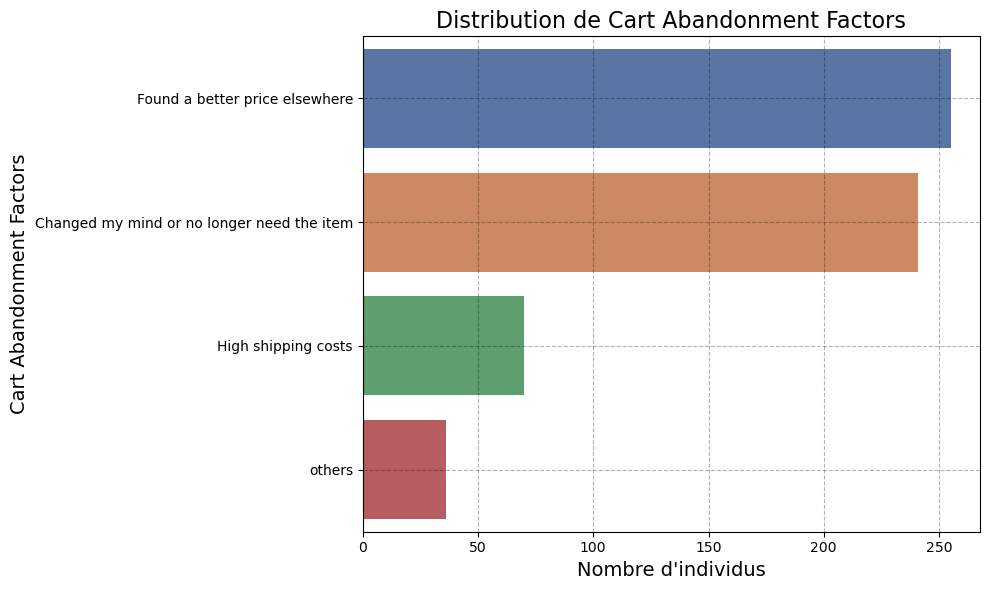

In [371]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data' is your DataFrame
# Aggregate similar categories, you need to customize this based on your data
data['Grouped_Categories'] = data['Cart_Abandonment_Factors'].replace({
    'Category1': 'Group1',
    'Category2': 'Group1',
    'Category3': 'Group2',
    # Add more mappings as needed
})

# Count the occurrences of each grouped factor
factor_counts = data['Grouped_Categories'].value_counts()

# Plot the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=factor_counts.values, y=factor_counts.index, palette='deep', orient='h')

# Title and labels
plt.title('Distribution de Cart Abandonment Factors', fontsize=16)
plt.xlabel('Nombre d\'individus', fontsize=14)
plt.ylabel('Cart Abandonment Factors', fontsize=14)

# Add grid
plt.grid(True, linestyle='--', color='black', alpha=0.3)

# Adjust layout to prevent clipping of labels
plt.tight_layout()

# Show the plot
plt.show()


D'après le graphique à barres :

- **Trouvé un meilleur prix ailleurs** : La majorité des clients, représentés par la barre bleue la plus haute, abandonnent un achat parce qu'ils ont trouvé un meilleur prix ailleurs. Cela pourrait indiquer que ces clients sont sensibles au prix et cherchent toujours la meilleure affaire.
- **N'a plus besoin de l'article** : Un nombre significatif de clients, représentés par la barre orange, abandonnent un achat parce qu'ils n'ont plus besoin de l'article. Cela pourrait indiquer que ces clients ajoutent des articles à leur panier pour les sauvegarder pour plus tard, mais peuvent changer d'avis ou trouver une alternative entre-temps.
- **Frais de livraison élevés** : Un nombre plus petit de clients, représentés par la barre verte, abandonnent un achat en raison de frais de livraison élevés. Ces clients pourraient être ceux qui attendent des frais de livraison bas ou gratuits et sont dissuadés par des frais supplémentaires.
- **Autres** : Le nombre de clients qui abandonnent un achat pour d'autres raisons, représentés par la barre rouge, est le plus bas. Ces raisons pourraient inclure une variété de facteurs tels que le délai de livraison, la qualité du produit, les avis des clients, etc.

Les facteurs qui influencent le plus la décision des clients d'abandonner un achat dans leur panier sont le fait de trouver un meilleur prix ailleurs, de ne plus avoir besoin de l'article et des frais de livraison élevés.

L'abandon du panier pourrait être lié à l'ajout de produits au panier pendant la navigation (dixième image), à la finalisation d'un achat après avoir ajouté des produits au panier (onzième image), à la méthode de recherche de produits (septième image), à l'exploration des résultats de recherche (huitième image) et à l'importance des avis des clients (neuvième image). Par exemple, les clients qui ajoutent des produits à leur panier pendant la navigation, qui utilisent des mots-clés pour rechercher des produits, qui explorent plusieurs pages de résultats, qui considèrent les avis des clients comme importants et qui sont incertains quant à la finalisation d'un achat après avoir ajouté des produits à leur panier pourraient être plus susceptibles d'abandonner un achat pour diverses raisons. Cependant, pour confirmer ces relations, une analyse plus approfondie serait nécessaire.

**Combien de clients utilisent la fonction "Enregistrer pour plus tard" d'Amazon, et à quelle fréquence ?**

In [354]:
data_S_F = data['Saveforlater_Frequency'].value_counts()

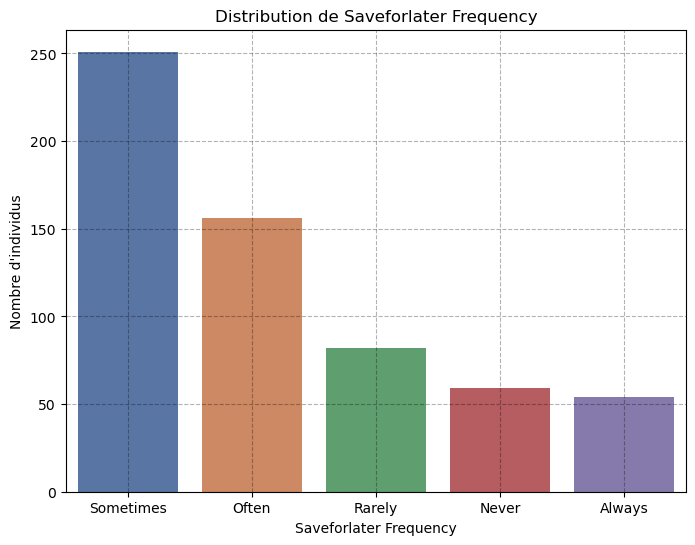

In [411]:
# vizualisation de la distribution de "Personalized Recommendation Frequency" : 
plt.figure(figsize=(8,6))
sns.barplot(x=data_S_F.index,y=data_S_F,palette='deep')
plt.title('Distribution de Saveforlater Frequency')
plt.xlabel('Saveforlater Frequency')
plt.ylabel('Nombre d\'individus')
plt.grid(True,linestyle='--',color='black',alpha=0.3)
path_to_save = 'C:\\Users\\amine\\Desktop\\educations\\projects\\Logistic Regression\\Amazon Customer Behavior Survey\\graphe et image de projet\\13 Distribution de Saveforlater Frequency.png'  # Remplacez par le chemin et le nom de fichier souhaités

# Enregistrez l'image à l'emplacement spécifié
plt.savefig(path_to_save)
plt.show()

D'après le graphique à barres :

- **Parfois** : La majorité des clients, représentés par la barre bleue la plus haute, utilisent la fonction "Enregistrer pour plus tard" parfois. Cela pourrait indiquer que ces clients utilisent cette fonction lorsqu'ils trouvent des produits intéressants mais ne sont pas encore prêts à les acheter.
- **Souvent** : Un nombre significatif de clients, représentés par la barre orange, utilisent souvent la fonction "Enregistrer pour plus tard". Ces clients pourraient être ceux qui planifient leurs achats ou qui aiment comparer différents produits avant de prendre une décision.
- **Rarement** : Un nombre plus petit de clients, représentés par la barre verte, utilisent rarement la fonction "Enregistrer pour plus tard". Ces clients pourraient être ceux qui préfèrent faire des achats immédiats ou qui n'utilisent pas souvent Amazon pour faire du shopping.
- **Jamais** : Un nombre encore plus petit de clients, représentés par la barre violette, n'utilisent jamais la fonction "Enregistrer pour plus tard". Ces clients pourraient être ceux qui ne sont pas familiers avec cette fonction ou qui préfèrent ne pas l'utiliser pour diverses raisons.
- **Toujours** : Le nombre de clients qui utilisent toujours la fonction "Enregistrer pour plus tard", représentés par la barre rouge, est le plus bas. Ces clients pourraient être ceux qui dépendent fortement de cette fonction pour organiser leurs achats potentiels.

La majorité des clients utilisent la fonction "Enregistrer pour plus tard" parfois, tandis qu'un nombre significatif de clients l'utilisent souvent. Un nombre plus petit de clients l'utilisent rarement, jamais ou toujours.

L'utilisation de la fonction "Enregistrer pour plus tard" pourrait être liée à l'ajout de produits au panier pendant la navigation (dixième image), à la finalisation d'un achat après avoir ajouté des produits au panier (onzième image), à l'abandon du panier (douzième image), à la méthode de recherche de produits (septième image), à l'exploration des résultats de recherche (huitième image) et à l'importance des avis des clients (neuvième image). Par exemple, les clients qui ajoutent des produits à leur panier pendant la navigation, qui sont incertains quant à la finalisation d'un achat après avoir ajouté des produits à leur panier, qui abandonnent parfois un achat pour diverses raisons, qui utilisent des mots-clés pour rechercher des produits, qui explorent plusieurs pages de résultats et qui considèrent les avis des clients comme importants pourraient être plus susceptibles d'utiliser la fonction "Enregistrer pour plus tard". Cependant, pour confirmer ces relations, une analyse plus approfondie serait nécessaire. 

**Combien de clients ont déjà laissé un avis sur un produit sur Amazon ?**

In [372]:
data_R_L = data['Review_Left'].value_counts()

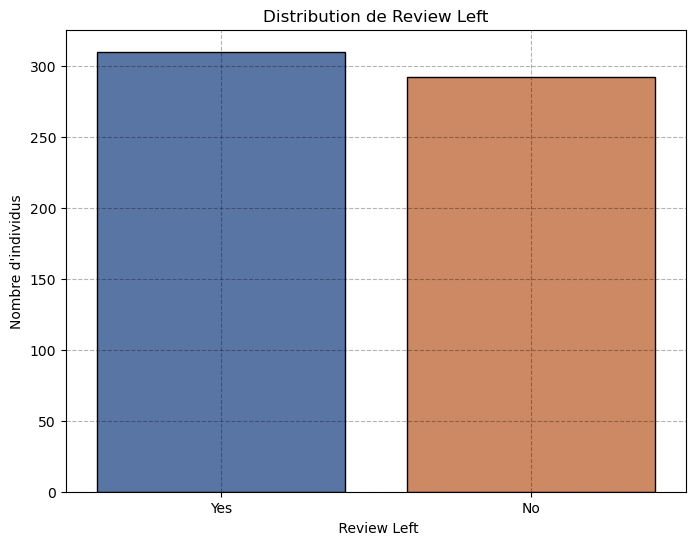

In [412]:

# vizualisation de la distribution de "Personalized Recommendation Frequency" : 
plt.figure(figsize=(8,6))
sns.barplot(x=data_R_L.index,y=data_R_L,palette='deep',edgecolor = 'black')
plt.title('Distribution de Review Left')
plt.xlabel(' Review Left')
plt.ylabel('Nombre d\'individus')
plt.grid(True,linestyle='--',alpha=0.3,color='black')
path_to_save = 'C:\\Users\\amine\\Desktop\\educations\\projects\\Logistic Regression\\Amazon Customer Behavior Survey\\graphe et image de projet\\14 Distribution de Review Left.png'  # Remplacez par le chemin et le nom de fichier souhaités

# Enregistrez l'image à l'emplacement spécifié
plt.savefig(path_to_save)
plt.show()

D'après le graphique à barres:

- **Oui** : La majorité des clients, représentés par la barre bleue, ont déjà laissé un avis sur un produit sur Amazon. Cela pourrait indiquer que ces clients sont engagés et disposés à partager leurs expériences pour aider d'autres clients.
- **Non** : Un nombre plus petit de clients, représentés par la barre orange, n'ont pas laissé d'avis sur un produit sur Amazon. Ces clients pourraient être ceux qui préfèrent ne pas partager leurs expériences ou qui n'ont pas eu l'occasion de le faire.

La majorité des clients ont déjà laissé un avis sur un produit sur Amazon, tandis qu'un nombre plus petit de clients ne l'ont pas fait.

Le fait de laisser un avis pourrait être lié à l'ajout de produits au panier pendant la navigation (dixième image), à la finalisation d'un achat après avoir ajouté des produits au panier (onzième image), à l'abandon du panier (douzième image), à l'utilisation de la fonction "Enregistrer pour plus tard" (treizième image), à la méthode de recherche de produits (septième image), à l'exploration des résultats de recherche (huitième image) et à l'importance des avis des clients (neuvième image). Par exemple, les clients qui ajoutent des produits à leur panier pendant la navigation, qui finalisent un achat après avoir ajouté des produits à leur panier, qui utilisent la fonction "Enregistrer pour plus tard", qui utilisent des mots-clés pour rechercher des produits, qui explorent plusieurs pages de résultats et qui considèrent les avis des clients comme importants pourraient être plus susceptibles de laisser un avis sur un produit. Cependant, pour confirmer ces relations, une analyse plus approfondie serait nécessaire. 

**Dans quelle mesure les clients font-ils confiance aux avis sur les produits lorsqu'ils effectuent un achat ?**

In [375]:
data_R_R = data['Review_Reliability'].value_counts()

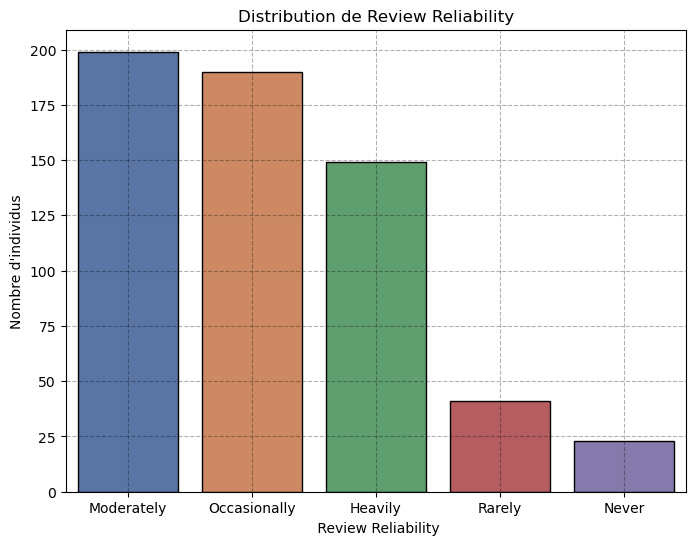

In [413]:
# vizualisation de la distribution de "Personalized Recommendation Frequency" : 
plt.figure(figsize=(8,6))
sns.barplot(x=data_R_R.index,y=data_R_R,palette='deep',edgecolor = 'black')
plt.title('Distribution de Review Reliability')
plt.xlabel(' Review Reliability')
plt.ylabel('Nombre d\'individus')
plt.grid(True,linestyle='--',color='black',alpha=0.3)
path_to_save = 'C:\\Users\\amine\\Desktop\\educations\\projects\\Logistic Regression\\Amazon Customer Behavior Survey\\graphe et image de projet\\15 Distribution de Review Reliability.png'  # Remplacez par le chemin et le nom de fichier souhaités

# Enregistrez l'image à l'emplacement spécifié
plt.savefig(path_to_save)
plt.show()

D'après le graphique à barres :

- **Modérément** : La majorité des clients, représentés par la barre la plus haute, font modérément confiance aux avis sur les produits. Cela pourrait indiquer que ces clients prennent en compte les avis sur les produits dans leur processus de prise de décision, mais ne s'y fient pas entièrement.
- **Occasionnellement** : Un nombre significatif de clients, représentés par la deuxième barre la plus haute, font occasionnellement confiance aux avis sur les produits. Ces clients pourraient être ceux qui consultent les avis sur les produits de temps en temps, peut-être pour des achats plus importants ou plus coûteux.
- **Fortement** : Un nombre plus petit de clients, représentés par la troisième barre la plus haute, font fortement confiance aux avis sur les produits. Ces clients pourraient être ceux qui dépendent fortement des avis sur les produits pour prendre leurs décisions d'achat.
- **Rarement** : Un nombre encore plus petit de clients, représentés par la quatrième barre la plus haute, font rarement confiance aux avis sur les produits. Ces clients pourraient être ceux qui préfèrent faire leurs propres recherches ou qui ont des préférences d'achat spécifiques qui ne sont pas influencées par les avis sur les produits.
- **Jamais** : Le nombre de clients qui ne font jamais confiance aux avis sur les produits, représentés par la barre la plus basse, est le plus bas. Ces clients pourraient être ceux qui ne sont pas influencés par les opinions des autres ou qui préfèrent se fier à leur propre jugement.

La majorité des clients font modérément confiance aux avis sur les produits lorsqu'ils effectuent un achat, tandis qu'un nombre significatif de clients le font occasionnellement. Un nombre plus petit de clients font fortement confiance aux avis sur les produits, et un nombre encore plus petit de clients le font rarement ou jamais.

La confiance dans les avis sur les produits pourrait être liée à l'ajout de produits au panier pendant la navigation (dixième image), à la finalisation d'un achat après avoir ajouté des produits au panier (onzième image), à l'abandon du panier (douzième image), à l'utilisation de la fonction "Enregistrer pour plus tard" (treizième image), à la méthode de recherche de produits (septième image), et à l'exploration des résultats de recherche (huitième image). Par exemple, les clients qui ajoutent des produits à leur panier pendant la navigation, qui finalisent un achat après avoir ajouté des produits à leur panier, qui utilisent la fonction "Enregistrer pour plus tard", qui utilisent des mots-clés pour rechercher des produits, et qui explorent plusieurs pages de résultats pourraient être plus susceptibles de faire confiance aux avis sur les produits. Cependant, pour confirmer ces relations, une analyse plus approfondie serait nécessaire.

**Les clients trouvent-ils des informations utiles dans les avis d'autres clients ?**

In [377]:
data_R_H = data['Review_Helpfulness'].value_counts()

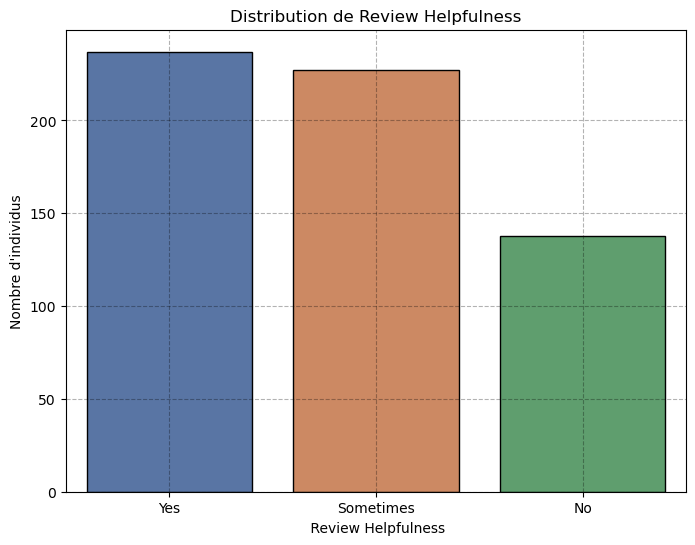

In [414]:
# vizualisation de la distribution de "Personalized Recommendation Frequency" : 
plt.figure(figsize=(8,6))
sns.barplot(x=data_R_H.index,y=data_R_H,palette='deep',edgecolor = 'black')
plt.title('Distribution de Review Helpfulness')
plt.xlabel(' Review Helpfulness')
plt.ylabel('Nombre d\'individus')
plt.grid(True,linestyle='--',color='black',alpha=0.3)
path_to_save = 'C:\\Users\\amine\\Desktop\\educations\\projects\\Logistic Regression\\Amazon Customer Behavior Survey\\graphe et image de projet\\16 Distribution de Review Helpfulness.png'  # Remplacez par le chemin et le nom de fichier souhaités

# Enregistrez l'image à l'emplacement spécifié
plt.savefig(path_to_save)
plt.show()

D'après le graphique à barres :

- **Oui** : La majorité des clients, représentés par la barre bleue la plus haute, trouvent des informations utiles dans les avis d'autres clients. Cela pourrait indiquer que ces clients apprécient les avis d'autres clients pour obtenir des informations sur la qualité du produit, l'expérience d'utilisation, etc.
- **Parfois** : Un nombre significatif de clients, représentés par la barre orange, trouvent parfois des informations utiles dans les avis d'autres clients. Ces clients pourraient être ceux qui consultent les avis sur les produits de temps en temps, peut-être pour des achats plus importants ou plus coûteux.
- **Non** : Un nombre plus petit de clients, représentés par la barre verte, ne trouvent pas d'informations utiles dans les avis d'autres clients. Ces clients pourraient être ceux qui préfèrent faire leurs propres recherches ou qui ont des préférences d'achat spécifiques qui ne sont pas influencées par les avis sur les produits.

La majorité des clients trouvent des informations utiles dans les avis d'autres clients lorsqu'ils effectuent un achat, tandis qu'un nombre significatif de clients le trouvent parfois utile. Un nombre plus petit de clients ne trouvent pas d'informations utiles dans les avis d'autres clients.

L'utilité des avis sur les produits pourrait être liée à l'ajout de produits au panier pendant la navigation (dixième image), à la finalisation d'un achat après avoir ajouté des produits au panier (onzième image), à l'abandon du panier (douzième image), à l'utilisation de la fonction "Enregistrer pour plus tard" (treizième image), à la méthode de recherche de produits (septième image), et à l'exploration des résultats de recherche (huitième image). Par exemple, les clients qui ajoutent des produits à leur panier pendant la navigation, qui finalisent un achat après avoir ajouté des produits à leur panier, qui utilisent la fonction "Enregistrer pour plus tard", qui utilisent des mots-clés pour rechercher des produits, et qui explorent plusieurs pages de résultats pourraient être plus susceptibles de trouver des informations utiles dans les avis sur les produits. Cependant, pour confirmer ces relations, une analyse plus approfondie serait nécessaire. 😊

**À quelle fréquence les clients reçoivent-ils des recommandations de produits personnalisées d'Amazon ?**

In [379]:
daad_P_R_F = data['Personalized_Recommendation_Frequency'].value_counts()

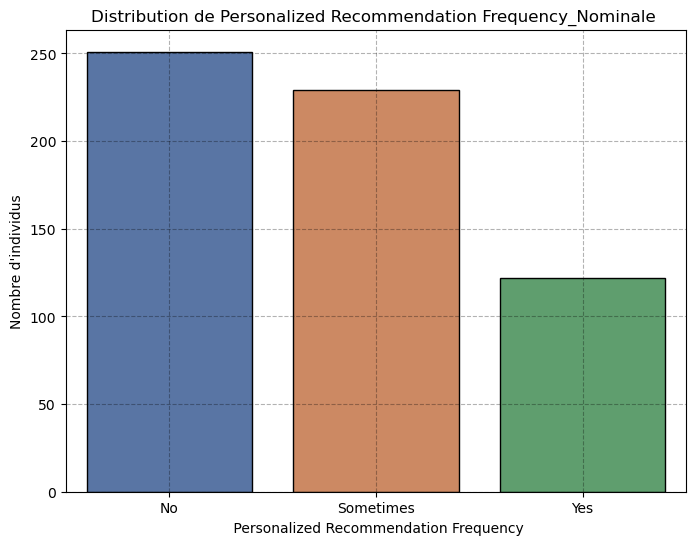

In [629]:
# vizualisation de la distribution de "Personalized Recommendation Frequency" : 
plt.figure(figsize=(8,6))
sns.barplot(x=daad_P_R_F.index,y=daad_P_R_F,palette='deep',edgecolor = 'black')
plt.title('Distribution de Personalized Recommendation Frequency_Nominale ')
plt.xlabel(' Personalized Recommendation Frequency')
plt.ylabel('Nombre d\'individus')
plt.grid(True,linestyle='--',color='black',alpha=0.3)
path_to_save = 'C:\\Users\\amine\\Desktop\\educations\\projects\\Logistic Regression\\Amazon Customer Behavior Survey\\graphe et image de projet\\17 Distribution de Personalized Recommendation Frequency.png'  # Remplacez par le chemin et le nom de fichier souhaités

# Enregistrez l'image à l'emplacement spécifié
plt.savefig(path_to_save)
plt.show()

**D’après les données présentées :**

* 251 clients ne reçoivent pas de recommandations de produits personnalisées.
* 229 clients en reçoivent parfois.
* 122 clients en reçoivent toujours.

Il semble donc que la majorité des clients ne reçoivent pas de recommandations de produits personnalisées d’Amazon, tandis qu’une part significative des clients en reçoit parfois. Un nombre plus restreint de clients en reçoit toujours.

**Comment les clients évaluent-ils la pertinence et la précision des recommandations qu'ils reçoivent ?**

In [384]:
data_R_A = data['Rating_Accuracy '].value_counts()

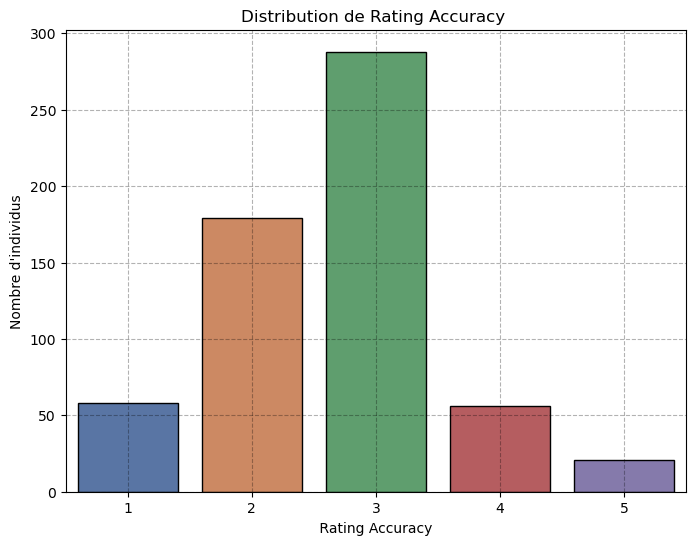

In [416]:
# vizualisation de la distribution de "Personalized Recommendation Frequency" : 
plt.figure(figsize=(8,6))
sns.barplot(x=data_R_A.index,y=data_R_A,palette='deep',edgecolor = 'black')
plt.title('Distribution de Rating Accuracy ')
plt.xlabel(' Rating Accuracy ')
plt.ylabel('Nombre d\'individus')
plt.grid(True,linestyle='--',color='black',alpha=0.3)
path_to_save = 'C:\\Users\\amine\\Desktop\\educations\\projects\\Logistic Regression\\Amazon Customer Behavior Survey\\graphe et image de projet\\19 Distribution de Rating Accuracy.png'  # Remplacez par le chemin et le nom de fichier souhaités

# Enregistrez l'image à l'emplacement spécifié
plt.savefig(path_to_save)
plt.show()

D'après le graphique à barres :

- **3 sur 5** : La majorité des clients, représentés par la barre la plus haute, évaluent la pertinence et la précision des recommandations qu'ils reçoivent comme étant de 3 sur 5. Cela pourrait indiquer que ces clients trouvent les recommandations modérément pertinentes et précises.
- **2 sur 5** : Un nombre significatif de clients, représentés par la deuxième barre la plus haute, évaluent la pertinence et la précision des recommandations qu'ils reçoivent comme étant de 2 sur 5. Ces clients pourraient être ceux qui trouvent les recommandations relativement peu pertinentes ou précises.
- **1 sur 5** : Un nombre plus petit de clients, représentés par la troisième barre la plus haute, évaluent la pertinence et la précision des recommandations qu'ils reçoivent comme étant de 1 sur 5. Ces clients pourraient être ceux qui ne trouvent pas les recommandations pertinentes ou précises.
- **4 sur 5** : Un nombre encore plus petit de clients, représentés par la quatrième barre la plus haute, évaluent la pertinence et la précision des recommandations qu'ils reçoivent comme étant de 4 sur 5. Ces clients pourraient être ceux qui trouvent les recommandations très pertinentes et précises.
- **5 sur 5** : Le nombre de clients qui évaluent la pertinence et la précision des recommandations qu'ils reçoivent comme étant de 5 sur 5, représentés par la barre la plus basse, est le plus bas. Ces clients pourraient être ceux qui trouvent les recommandations extrêmement pertinentes et précises.

La majorité des clients évaluent la pertinence et la précision des recommandations qu'ils reçoivent comme étant modérées, tandis qu'un nombre significatif de clients les évaluent comme relativement faibles. Un nombre plus petit de clients les évaluent comme étant faibles, très élevées ou extrêmement élevées.

L'évaluation de la pertinence et de la précision des recommandations pourrait être liée à la réception de recommandations de produits personnalisées (dix-septième image), à l'ajout de produits au panier pendant la navigation (dixième image), à la finalisation d'un achat après avoir ajouté des produits au panier (onzième image), à l'abandon du panier (douzième image), à l'utilisation de la fonction "Enregistrer pour plus tard" (treizième image), à la méthode de recherche de produits (septième image), à l'exploration des résultats de recherche (huitième image), et à l'importance des avis des clients (neuvième image). Par exemple, les clients qui reçoivent des recommandations de produits personnalisées, qui ajoutent des produits à leur panier pendant la navigation, qui finalisent un achat après avoir ajouté des produits à leur panier, qui utilisent la fonction "Enregistrer pour plus tard", qui utilisent des mots-clés pour rechercher des produits, qui explorent plusieurs pages de résultats et qui considèrent les avis des clients comme importants pourraient être plus susceptibles d'évaluer la pertinence et la précision des recommandations comme étant élevées. Cependant, pour confirmer ces relations, une analyse plus approfondie serait nécessaire.

**Dans quelle mesure les clients sont-ils satisfaits de leur expérience d'achat globale sur Amazon ?**

In [386]:
data_S_S = data['Shopping_Satisfaction'].value_counts()

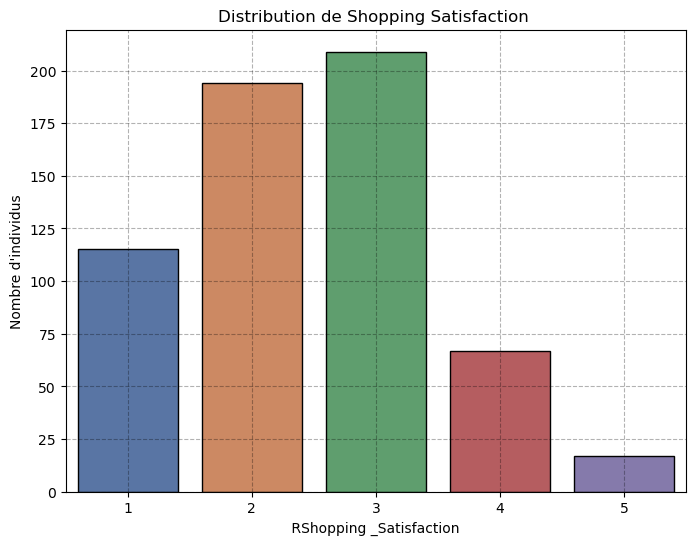

In [417]:
# vizualisation de la distribution de "Personalized Recommendation Frequency" : 
plt.figure(figsize=(8,6))
sns.barplot(x=data_S_S.index,y=data_S_S,palette='deep',edgecolor = 'black')
plt.title('Distribution de Shopping Satisfaction ')
plt.xlabel(' RShopping _Satisfaction ')
plt.ylabel('Nombre d\'individus')
plt.grid(True,linestyle='--',color='black',alpha=0.3)
path_to_save = 'C:\\Users\\amine\\Desktop\\educations\\projects\\Logistic Regression\\Amazon Customer Behavior Survey\\graphe et image de projet\\20 Distribution de Shopping _Satisfaction.png'  # Remplacez par le chemin et le nom de fichier souhaités

# Enregistrez l'image à l'emplacement spécifié
plt.savefig(path_to_save)
plt.show()

D'après les données fournies:

- **209 clients** ont donné une note de **3** sur 5.
- **194 clients** ont donné une note de **2** sur 5.
- **115 clients** ont donné une note de **1** sur 5.
- **67 clients** ont donné une note de **4** sur 5.
- **17 clients** ont donné une note de **5** sur 5.

Cela suggère que la majorité des clients ont une expérience d'achat moyennement satisfaisante sur Amazon, avec une note de 3 sur 5. Cependant, il y a aussi une proportion significative de clients qui ont une expérience moins satisfaisante, avec une note de 2 ou 1. Seuls quelques clients ont donné une note de 4 ou 5, indiquant une expérience d'achat très satisfaisante. Il est important de noter que ces résultats peuvent varier en fonction de divers facteurs tels que la sélection de produits, le service client, les délais de livraison, etc.

**Quels aspects des services d'Amazon sont les plus appréciés par les clients ?**

In [388]:
data_S_App = data['Service_Appreciation'].value_counts()

**Remarque** : Il semble y avoir quelques problèmes de nettoyage des données dans la colonne "Service_Appréciation". Vous avez des doublons, des espaces, et un point (".") qui apparaît également.

In [389]:
# voir le contenu de ce colonne 
data['Service_Appreciation'].unique()

array(['Competitive prices', 'Wide product selection',
       'User-friendly website/app interface', '.', 'Customer service ',
       'Product recommendations', 'Customer service', 'Quick delivery',
       'All the above'], dtype=object)

In [390]:
# Nettoyer la colonne 'Service_Appreciation'
data['Service_Appreciation'] = data['Service_Appreciation'].str.strip()  # Supprimer les espaces en début et en fin de chaîne
data['Service_Appreciation'] = data['Service_Appreciation'].replace({'Customer service ': 'Customer service'})  # Corriger la valeur en doublon
data = data[data['Service_Appreciation'] != '.']

# Afficher les catégories uniques et leurs comptes mis à jour
service_appreciation_counts = data['Service_Appreciation'].value_counts()
print(service_appreciation_counts)


Service_Appreciation
Product recommendations                185
Competitive prices                     182
Wide product selection                 150
User-friendly website/app interface     80
Customer service                         2
Quick delivery                           1
All the above                            1
Name: count, dtype: int64


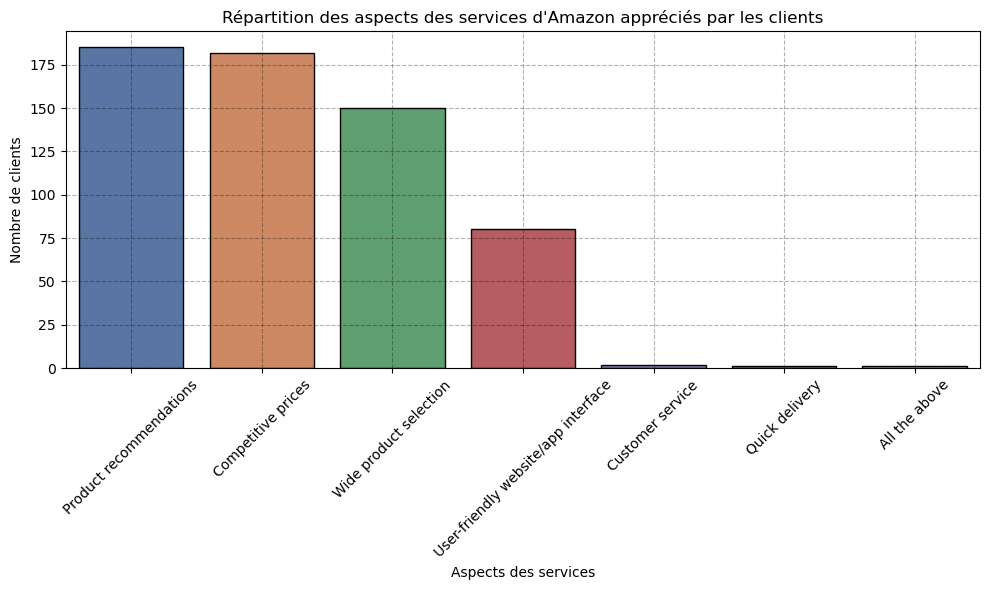

In [418]:
# Comptez le nombre de réponses par catégorie
service_counts = data['Service_Appreciation'].value_counts()

# Créez un graphique à barres
plt.figure(figsize=(10, 6))
sns.barplot(x=service_appreciation_counts.index,y=service_appreciation_counts,palette='deep',edgecolor = 'black')
plt.title("Répartition des aspects des services d'Amazon appréciés par les clients")
plt.xlabel("Aspects des services")
plt.ylabel("Nombre de clients")
plt.grid(True,linestyle='--',color='black',alpha=0.3)
plt.xticks(rotation = 45)
# Affichez le graphique
plt.tight_layout()
path_to_save = 'C:\\Users\\amine\\Desktop\\educations\\projects\\Logistic Regression\\Amazon Customer Behavior Survey\\graphe et image de projet\\21 Répartition des aspects des services d\'Amazon appréciés par les clients.png'  # Remplacez par le chemin et le nom de fichier souhaités

# Enregistrez l'image à l'emplacement spécifié
plt.savefig(path_to_save)
plt.show()


**D’après les données présentées:**

* 185 clients apprécient les recommandations de produits.
* 182 clients apprécient les prix compétitifs.
* 150 clients apprécient la large sélection de produits.
* 80 clients apprécient l’interface conviviale du site web/de l’application.
* 2 clients apprécient le service client.
* 1 client apprécie la livraison rapide.
* 1 client apprécie tous les aspects mentionnés ci-dessus.

Il semble donc que les recommandations de produits et les prix compétitifs sont les aspects les plus appréciés des services d’Amazon. Cependant, une part significative des clients apprécie également la large sélection de produits et l’interface conviviale du site web/de l’application.* 

**Y a-t-il des domaines où les clients pensent qu'Amazon pourrait s'améliorer ?**

In [393]:
data['Improvement_Areas'].value_counts()

Improvement_Areas
Customer service responsiveness                                                   217
Product quality and accuracy                                                      159
Reducing packaging waste                                                          133
Shipping speed and reliability                                                     79
Quality of product is very poor according to the big offers                         1
I don't have any problem with Amazon                                                1
User interface of app                                                               1
Irrelevant product suggestions                                                      1
User interface                                                                      1
I have no problem with Amazon yet. But others tell me about the refund issues       1
UI                                                                                  1
Scrolling option would be much bette

**Remarque :** Pour la priorisation des problèmes, je recommanderais de classer les domaines d'amélioration en fonction du nombre de réponses et de leur impact potentiel sur la satisfaction client. Dans ce cas, "Customer service responsiveness," "Product quality and accuracy," "Reducing packaging waste," et "Shipping speed and reliability" semblent être les domaines les plus importants.

In [394]:
# Sélectionnez les catégories d'intérêt
categories_of_interest = [
    "Customer service responsiveness",
    "Product quality and accuracy",
    "Reducing packaging waste",
    "Shipping speed and reliability"
]

# Filtrez le DataFrame pour inclure uniquement les lignes correspondant à ces catégories
filtered_data = data[data['Improvement_Areas'].isin(categories_of_interest)]

# Obtenez le compte des catégories spécifiques
counts = filtered_data['Improvement_Areas'].value_counts()

# Affichez le résultat
print(counts)


Improvement_Areas
Customer service responsiveness    217
Product quality and accuracy       159
Reducing packaging waste           133
Shipping speed and reliability      79
Name: count, dtype: int64


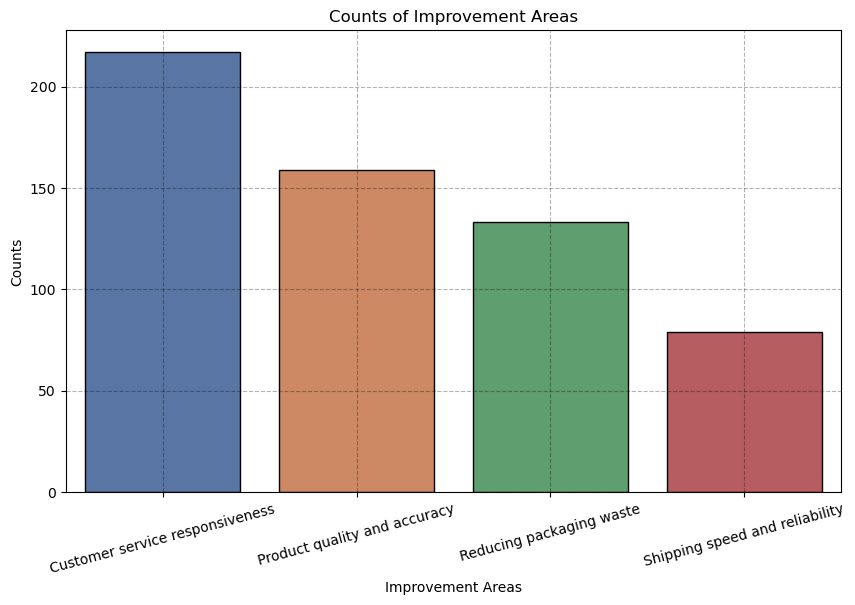

In [395]:
import matplotlib.pyplot as plt

# Create a bar plot for the counts
plt.figure(figsize=(10, 6))
sns.barplot(x=counts.index,y=counts,palette='deep',edgecolor = 'black')
plt.title('Counts of Improvement Areas')
plt.xlabel('Improvement Areas')
plt.ylabel('Counts')
plt.xticks(rotation=15)  # Rotate the x-axis labels for better visibility
plt.grid(True,linestyle='--',color='black',alpha=0.3)

path_to_save = 'C:\\Users\\amine\\Desktop\\educations\\projects\\Logistic Regression\\Amazon Customer Behavior Survey\\graphe et image de projet\\Counts of Improvement Areas.png'  # Remplacez par le chemin et le nom de fichier souhaités

# Enregistrez l'image à l'emplacement spécifié
plt.savefig(path_to_save)
# Show the plot
plt.show()


# test d'indépendance entre les variables quantitatives : 

In [466]:
data.columns

Index(['Timestamp', 'age', 'Gender', 'Purchase_Frequency',
       'Purchase_Categories', 'Personalized_Recommendation_Frequency',
       'Browsing_Frequency', 'Product_Search_Method',
       'Search_Result_Exploration', 'Customer_Reviews_Importance',
       'Add_to_Cart_Browsing', 'Cart_Completion_Frequency',
       'Cart_Abandonment_Factors', 'Saveforlater_Frequency', 'Review_Left',
       'Review_Reliability', 'Review_Helpfulness',
       'Personalized_Recommendation_Frequency ', 'Recommendation_Helpfulness',
       'Rating_Accuracy ', 'Shopping_Satisfaction', 'Service_Appreciation',
       'Improvement_Areas', 'Grouped_Categories'],
      dtype='object')

**formulation des hypothéses :** 

- **Hypothèse nulle H0 :** Il n'y a pas de relation statistiquement significative entre les deux variables catégorielles. En d'autres termes, les variables sont indépendantes.

- **Hypothèse alternative H1 :** Il existe une relation statistiquement significative entre les deux variables catégorielles. Les variables ne sont pas indépendantes.



In [467]:
categorical_cols = ['Gender', 'Purchase_Frequency',
                     'Purchase_Categories', 'Personalized_Recommendation_Frequency',
                     'Browsing_Frequency', 'Product_Search_Method',
                     'Search_Result_Exploration', 'Customer_Reviews_Importance',
                     'Add_to_Cart_Browsing', 'Cart_Completion_Frequency',
                     'Cart_Abandonment_Factors', 'Saveforlater_Frequency', 'Review_Left',
                     'Review_Reliability', 'Review_Helpfulness',
                     'Personalized_Recommendation_Frequency ', 'Recommendation_Helpfulness',
                     'Rating_Accuracy ', 'Shopping_Satisfaction', 'Service_Appreciation',
                     'Improvement_Areas', 'Grouped_Categories']

# Set a p-value threshold for feature selection
p_value_threshold = 0.05

# Perform the Chi-squared test for independence for all pairs of variables
selected_pairs = []
for pair in combinations(categorical_cols, 2):
    contingency_table = pd.crosstab(data[pair[0]], data[pair[1]])
    chi2, p, _, _ = chi2_contingency(contingency_table)
    print(f"Chi-square test between {pair[0]} and {pair[1]}:")
    print(f"Chi-square statistic: {chi2}, p-value: {p}")

    if p < p_value_threshold:
        selected_pairs.append(pair)

# Print the automatically selected pairs
print("Automatically selected pairs based on p-value threshold:")
print(selected_pairs)


Chi-square test between Gender and Purchase_Frequency:
Chi-square statistic: 32.906280984135776, p-value: 0.001001152680931906
Chi-square test between Gender and Purchase_Categories:
Chi-square statistic: 151.0048545299717, p-value: 1.0199333236521182e-05
Chi-square test between Gender and Personalized_Recommendation_Frequency:
Chi-square statistic: 15.49313411337437, p-value: 0.016749198402039745
Chi-square test between Gender and Browsing_Frequency:
Chi-square statistic: 23.317014556950525, p-value: 0.0055222700169171935
Chi-square test between Gender and Product_Search_Method:
Chi-square statistic: 25.424723734549353, p-value: 0.002535580766099553
Chi-square test between Gender and Search_Result_Exploration:
Chi-square statistic: 6.918431446573709, p-value: 0.07454358649334304
Chi-square test between Gender and Customer_Reviews_Importance:
Chi-square statistic: 35.98276129766054, p-value: 0.00032606696790320617
Chi-square test between Gender and Add_to_Cart_Browsing:
Chi-square stat

Chi-square test between Purchase_Categories and Grouped_Categories:
Chi-square statistic: 104.48790725871359, p-value: 0.06446659310188657
Chi-square test between Personalized_Recommendation_Frequency and Browsing_Frequency:
Chi-square statistic: 46.68856902798402, p-value: 2.15874963202873e-08
Chi-square test between Personalized_Recommendation_Frequency and Product_Search_Method:
Chi-square statistic: 42.15529030311776, p-value: 1.7134072907562392e-07
Chi-square test between Personalized_Recommendation_Frequency and Search_Result_Exploration:
Chi-square statistic: 10.89279020917146, p-value: 0.004311820369226899
Chi-square test between Personalized_Recommendation_Frequency and Customer_Reviews_Importance:
Chi-square statistic: 33.783178311443926, p-value: 4.447059448008885e-05
Chi-square test between Personalized_Recommendation_Frequency and Add_to_Cart_Browsing:
Chi-square statistic: 84.45761781220787, p-value: 1.977127078570383e-17
Chi-square test between Personalized_Recommendatio

Chi-square test between Search_Result_Exploration and Grouped_Categories:
Chi-square statistic: 8.607701875981899, p-value: 0.034988062036111815
Chi-square test between Customer_Reviews_Importance and Add_to_Cart_Browsing:
Chi-square statistic: 156.70006088702814, p-value: 7.829116882905331e-30
Chi-square test between Customer_Reviews_Importance and Cart_Completion_Frequency:
Chi-square statistic: 75.06448415715971, p-value: 1.2734534488895316e-09
Chi-square test between Customer_Reviews_Importance and Cart_Abandonment_Factors:
Chi-square statistic: 38.737320146286095, p-value: 0.00011624947401168799
Chi-square test between Customer_Reviews_Importance and Saveforlater_Frequency:
Chi-square statistic: 83.6838018680602, p-value: 3.583519083673104e-11
Chi-square test between Customer_Reviews_Importance and Review_Left:
Chi-square statistic: 1.335167553488658, p-value: 0.8553812198279427
Chi-square test between Customer_Reviews_Importance and Review_Reliability:
Chi-square statistic: 228.3

Chi-square test between Review_Helpfulness and Rating_Accuracy :
Chi-square statistic: 33.930747859789754, p-value: 4.18172780080023e-05
Chi-square test between Review_Helpfulness and Shopping_Satisfaction:
Chi-square statistic: 40.5219857341354, p-value: 2.560498471516945e-06
Chi-square test between Review_Helpfulness and Service_Appreciation:
Chi-square statistic: 60.92540502348256, p-value: 1.5299486663439085e-08
Chi-square test between Review_Helpfulness and Improvement_Areas:
Chi-square statistic: 47.00668821257219, p-value: 0.04234768825050309
Chi-square test between Review_Helpfulness and Grouped_Categories:
Chi-square statistic: 12.721499067738483, p-value: 0.04767802583897619
Chi-square test between Personalized_Recommendation_Frequency  and Recommendation_Helpfulness:
Chi-square statistic: 65.43555609357313, p-value: 3.957694101052292e-11
Chi-square test between Personalized_Recommendation_Frequency  and Rating_Accuracy :
Chi-square statistic: 313.1565668283144, p-value: 4.77

 -**0 :** Cela pourrait indiquer que le test de chi-carré n'a pas rejeté l'hypothèse nulle H0, ce qui suggère que les deux variables correspondantes sont indépendantes (p-value ≥ 0.05). 
 - **1 :** Cela pourrait indiquer que le test de chi-carré a rejeté l'hypothèse nulle H0, suggérant ainsi qu'il y a une relation statistiquement significative entre les deux variables correspondantes (p-value < 0.05).


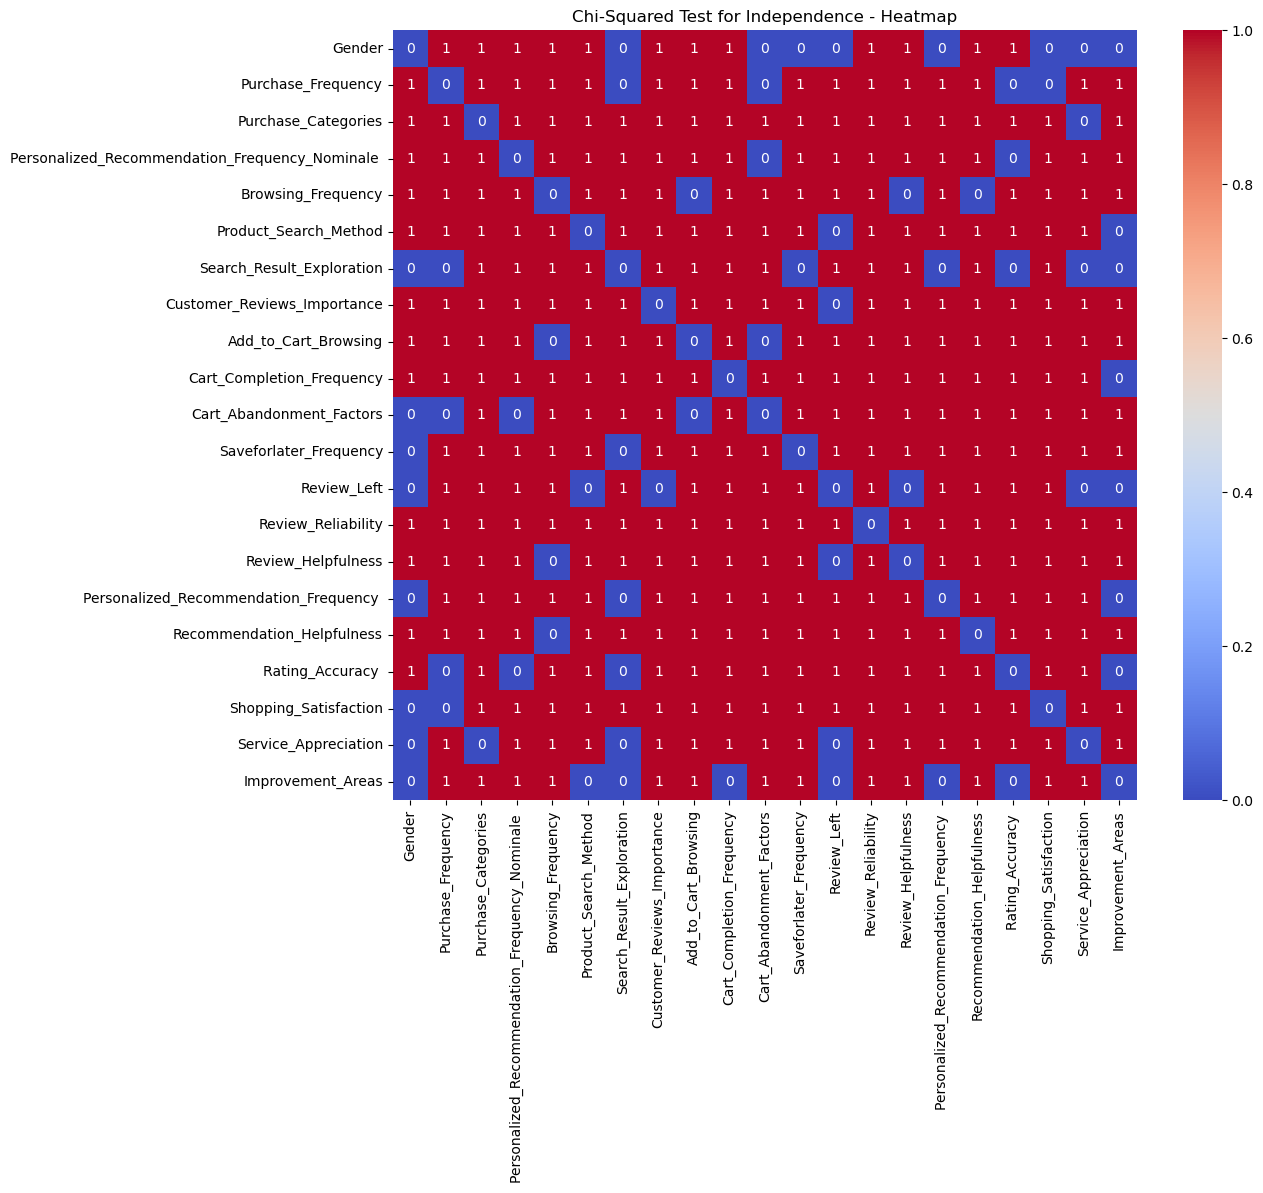

In [509]:
categorical_cols =  ['Gender', 'Purchase_Frequency', 'Purchase_Categories',
       'Personalized_Recommendation_Frequency_Nominale ', 'Browsing_Frequency',
       'Product_Search_Method', 'Search_Result_Exploration',
       'Customer_Reviews_Importance', 'Add_to_Cart_Browsing',
       'Cart_Completion_Frequency', 'Cart_Abandonment_Factors',
       'Saveforlater_Frequency', 'Review_Left', 'Review_Reliability',
       'Review_Helpfulness', 'Personalized_Recommendation_Frequency ',
       'Recommendation_Helpfulness', 'Rating_Accuracy ',
       'Shopping_Satisfaction', 'Service_Appreciation', 'Improvement_Areas']
# Set a p-value threshold for feature selection
p_value_threshold = 0.05

# Create a DataFrame to store the p-values
p_values_df = pd.DataFrame(index=categorical_cols, columns=categorical_cols)

# Perform the Chi-squared test for independence for all pairs of variables
for pair in combinations(categorical_cols, 2):
    contingency_table = pd.crosstab(data[pair[0]], data[pair[1]])
    chi2, p, _, _ = chi2_contingency(contingency_table)
    p_values_df.loc[pair[0], pair[1]] = p
    p_values_df.loc[pair[1], pair[0]] = p

# Convert p-values to a binary significance matrix
significance_matrix = p_values_df < p_value_threshold

# Create a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(significance_matrix, annot=True, cmap='coolwarm', fmt='d')
print(' -**0 :** Cela pourrait indiquer que le test de chi-carré n\'a pas rejeté l\'hypothèse nulle H0, ce qui suggère que les deux variables correspondantes sont indépendantes (p-value ≥ 0.05).','\n'

,'- **1 :** Cela pourrait indiquer que le test de chi-carré a rejeté l\'hypothèse nulle H0, suggérant ainsi qu\'il y a une relation statistiquement significative entre les deux variables correspondantes (p-value < 0.05).')
plt.title('Chi-Squared Test for Independence - Heatmap')
path_to_save = 'C:\\Users\\amine\\Desktop\\educations\\projects\\Logistic Regression\\Amazon Customer Behavior Survey\\graphe et image de projet\\heatmapChi-squared test for independence for all pairs of variables.png'  # Remplacez par le chemin et le nom de fichier souhaités

# Enregistrez l'image à l'emplacement spécifié
plt.savefig(path_to_save)
plt.show()


In [535]:
# on va crée une nouvelle data dans la quelle on va encoder les variables : 
data_encoding = data



In [536]:
data_encoding.drop(['Timestamp'],axis=1,inplace=True) # on a pas besoin de Timestamp 

In [537]:
data_encoding.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 602 entries, 0 to 601
Data columns (total 22 columns):
 #   Column                                           Non-Null Count  Dtype 
---  ------                                           --------------  ----- 
 0   age                                              602 non-null    int64 
 1   Gender                                           602 non-null    object
 2   Purchase_Frequency                               602 non-null    object
 3   Purchase_Categories                              602 non-null    object
 4   Personalized_Recommendation_Frequency_Nominale   602 non-null    object
 5   Browsing_Frequency                               602 non-null    object
 6   Product_Search_Method                            600 non-null    object
 7   Search_Result_Exploration                        602 non-null    object
 8   Customer_Reviews_Importance                      602 non-null    int64 
 9   Add_to_Cart_Browsing                       

## Extraction des valeurs uniques pour chaque variable : 


In [539]:
# Extract unique values for each object variable
unique_values = {}
for column in data_encoding.columns:
    unique_values[column] = data_encoding[column].unique()

for column, values in unique_values.items():
    print(f"Unique values for {column}:\n{values}\n")

Unique values for age:
[23 24 22 21 20 25 16 64 29 19 26 32 30 40 36 31 47 54 58 53 28 55 62 27
 34 44 38 35 42 37 45 50 63 46 33 60 18 17 57 41 39 48 49 15 43 52  3 67
 56 12]

Unique values for Gender:
['Female' 'Prefer not to say' 'Male' 'Others']

Unique values for Purchase_Frequency:
['Few times a month' 'Once a month' 'Less than once a month'
 'Multiple times a week' 'Once a week']

Unique values for Purchase_Categories:
['Beauty and Personal Care' 'Clothing and Fashion'
 'Groceries and Gourmet Food;Clothing and Fashion'
 'Beauty and Personal Care;Clothing and Fashion;others'
 'Beauty and Personal Care;Clothing and Fashion'
 'Beauty and Personal Care;Clothing and Fashion;Home and Kitchen'
 'Clothing and Fashion;Home and Kitchen' 'others'
 'Clothing and Fashion;others' 'Beauty and Personal Care;Home and Kitchen'
 'Groceries and Gourmet Food'
 'Groceries and Gourmet Food;Clothing and Fashion;others'
 'Groceries and Gourmet Food;Beauty and Personal Care;Clothing and Fashion;Home and

### Gestion des Variables dans l'Analyse de Données

In [545]:
quantitative_variable = ['age']



# Nominal variables
qualitative_nominal_vars = [
    'Gender',
    'Product_Search_Method',
    'Search_Result_Exploration',
    'Add_to_Cart_Browsing',
    'Personalized_Recommendation_Frequency_Nominale ',
    'Cart_Abandonment_Factors',
    'Review_Left',
    'Review_Helpfulness',
    'Recommendation_Helpfulness',
    'Purchase_Categories',
     'Service_Appreciation',
    'Improvement_Areas'
]


# Ordinal variables
qualitative_ordinal_vars = [
    'Personalized_Recommendation_Frequency ',
    'Purchase_Frequency',
    'Customer_Reviews_Importance',
    'Browsing_Frequency',
    'Cart_Completion_Frequency',
    'Saveforlater_Frequency',
    'Review_Reliability',
    'Rating_Accuracy ',
     'Shopping_Satisfaction'
]


### Encodage one-hot des variables nominales : 

In [542]:

# One-hot encoding for nominal variables
one_hot_encoder = OneHotEncoder(sparse=False, drop='first')
one_hot_encoded = one_hot_encoder.fit_transform(data_encoding[qualitative_nominal_vars].fillna('Missing'))
data_encoding_one_hot = pd.DataFrame(one_hot_encoded, columns=one_hot_encoder.get_feature_names_out(qualitative_nominal_vars))
data_encoding = pd.concat([data_encoding, data_encoding_one_hot], axis=1)

# Update the DataFrame after one-hot encoding
data_encoding = data_encoding.drop(columns=qualitative_nominal_vars)

data_encoding

,age,Purchase_Frequency,Browsing_Frequency,Customer_Reviews_Importance,Cart_Completion_Frequency,Saveforlater_Frequency,Review_Reliability,Personalized_Recommendation_Frequency,Rating_Accuracy,Shopping_Satisfaction,...,Improvement_Areas_Nothing,Improvement_Areas_Product quality and accuracy,Improvement_Areas_Quality of product is very poor according to the big offers,Improvement_Areas_Reducing packaging waste,Improvement_Areas_Scrolling option would be much better than going to next page,Improvement_Areas_Shipping speed and reliability,Improvement_Areas_UI,Improvement_Areas_User interface,Improvement_Areas_User interface of app,Improvement_Areas_better app interface and lower shipping charges
0,23,Few times a month,Few times a week,1,Sometimes,Sometimes,Occasionally,2,1,1,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,23,Once a month,Few times a month,1,Often,Rarely,Heavily,2,3,2,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,24,Few times a month,Few times a month,2,Sometimes,Rarely,Occasionally,4,3,3,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,24,Once a month,Few times a month,5,Sometimes,Sometimes,Heavily,3,3,4,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,22,Less than once a month,Few times a month,1,Sometimes,Rarely,Heavily,4,2,2,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
597,23,Once a week,Few times a week,4,Sometimes,Sometimes,Moderately,3,3,4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
598,23,Once a week,Few times a week,3,Sometimes,Sometimes,Heavily,3,3,3,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
599,23,Once a month,Few times a week,3,Sometimes,Sometimes,Occasionally,3,2,3,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
600,23,Few times a month,Few times a month,1,Often,Sometimes,Heavily,2,2,2,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Encodage Ordinal des Variables Qualitatives :

In [549]:
for column in qualitative_ordinal_vars:
    unique_values = data_encoding[column].unique()
    print(f"Unique values for {column}:", unique_values)


Unique values for Personalized_Recommendation_Frequency : [2 4 3 5 1]
Unique values for Purchase_Frequency: ['Few times a month' 'Once a month' 'Less than once a month'
 'Multiple times a week' 'Once a week']
Unique values for Customer_Reviews_Importance: [1 2 5 3 4]
Unique values for Browsing_Frequency: ['Few times a week' 'Few times a month' 'Rarely' 'Multiple times a day']
Unique values for Cart_Completion_Frequency: ['Sometimes' 'Often' 'Rarely' 'Never' 'Always']
Unique values for Saveforlater_Frequency: ['Sometimes' 'Rarely' 'Never' 'Often' 'Always']
Unique values for Review_Reliability: ['Occasionally' 'Heavily' 'Moderately' 'Never' 'Rarely']
Unique values for Rating_Accuracy : [1 3 2 5 4]
Unique values for Shopping_Satisfaction: [1 2 3 4 5]


In [553]:
from sklearn.preprocessing import OrdinalEncoder

# Define a dictionary with unique values for each ordinal variable
ordinal_categories = {
    'Personalized_Recommendation_Frequency ': [1, 2, 3, 4, 5],
    'Purchase_Frequency': ['Less than once a month', 'Few times a month', 'Few times a week', 'Multiple times a week', 'Once a month', 'Once a week'],
    'Customer_Reviews_Importance': [1, 2, 3, 4, 5],
    'Browsing_Frequency': ['Rarely', 'Few times a month', 'Few times a week', 'Multiple times a day'],
    'Cart_Completion_Frequency': ['Never', 'Rarely', 'Sometimes', 'Often', 'Always'],
    'Saveforlater_Frequency': ['Never', 'Rarely', 'Sometimes', 'Often', 'Always'],
    'Review_Reliability': ['Never', 'Rarely', 'Occasionally', 'Moderately', 'Heavily'],
    'Rating_Accuracy ': [1, 2, 3, 4, 5],
    'Shopping_Satisfaction': [1, 2, 3, 4, 5]
}

# Apply OrdinalEncoder to each ordinal variable
ordinal_encoder = OrdinalEncoder(categories=[ordinal_categories[var] for var in qualitative_ordinal_vars])
data_encoding[qualitative_ordinal_vars] = ordinal_encoder.fit_transform(data_encoding[qualitative_ordinal_vars].fillna('Missing'))


In [182]:
data_encoding.columns

Index(['age', 'Personalized_Recommendation_Frequency', 'Browsing_Frequency',
       'Customer_Reviews_Importance', 'Cart_Completion_Frequency',
       'Saveforlater_Frequency', 'Review_Reliability',
       'Personalized_Recommendation_Frequency ', 'Rating_Accuracy ',
       'Shopping_Satisfaction', 'Purchase_Frequency_encoding', 'Gender_Male',
       'Gender_Others', 'Gender_Prefer not to say',
       'Product_Search_Method_Keyword', 'Product_Search_Method_Missing',
       'Product_Search_Method_categories', 'Product_Search_Method_others',
       'Search_Result_Exploration_Multiple pages', 'Add_to_Cart_Browsing_No',
       'Add_to_Cart_Browsing_Yes',
       'Cart_Abandonment_Factors_Found a better price elsewhere',
       'Cart_Abandonment_Factors_High shipping costs',
       'Cart_Abandonment_Factors_others', 'Review_Left_Yes',
       'Review_Helpfulness_Sometimes', 'Review_Helpfulness_Yes',
       'Recommendation_Helpfulness_Sometimes',
       'Recommendation_Helpfulness_Yes'],
     

### Analyse de Corrélation Point-Biserial entre 'Review_Left_Yes' et la Variable Quantitative 'age' : 

Lors de la réalisation d'une analyse de corrélation point-biserial entre une variable binaire (catégorique) et une variable continue, les hypothèses nulle H0 et alternative H1 peuvent être formulées comme suit :

**Hypothèse Nulle H0 :**
Il n'existe aucune corrélation significative entre la variable binaire et la variable continue dans la population.

**Hypothèse Alternative H1 :**
Il existe une corrélation significative entre la variable binaire et la variable continue dans la population.

In [561]:
import pandas as pd
from scipy.stats import pointbiserialr

# Assuming 'data_encoding' is your DataFrame
X = data_encoding.drop('Review_Left_Yes', axis=1)
y = data_encoding['Review_Left_Yes']

# Quantitative variable
quantitative_variable = X['age']

# Calculate point-biserial correlation
point_biserial_corr, p_value = pointbiserialr(y, quantitative_variable)

# Print the correlation coefficient and p-value
print(f"Point-biserial correlation between Purchase_Frequency_encoding & Personalized_Recommendation_Frequency: {point_biserial_corr}")
print(f"P-value: {p_value}")



Point-biserial correlation between Purchase_Frequency_encoding & Personalized_Recommendation_Frequency: 0.05380872903844741
P-value: 0.18735455118439184


### Sélection des Caractéristiques par Tests Statistiques: 

In [563]:


# Assuming 'data_encoding' is your DataFrame
X = data_encoding.drop('Review_Left_Yes', axis=1)
y = data_encoding['Review_Left_Yes']

# SelectKBest with chi-square test for categorical variables
categorical_cols =  ['Purchase_Frequency', 'Browsing_Frequency',
       'Customer_Reviews_Importance', 'Cart_Completion_Frequency',
       'Saveforlater_Frequency', 'Review_Reliability',
       'Personalized_Recommendation_Frequency ', 'Rating_Accuracy ',
       'Shopping_Satisfaction', 'Gender_Male', 'Gender_Others',
       'Gender_Prefer not to say', 'Product_Search_Method_Keyword',
       'Product_Search_Method_Missing', 'Product_Search_Method_categories',
       'Product_Search_Method_others',
       'Search_Result_Exploration_Multiple pages', 'Add_to_Cart_Browsing_No',
       'Add_to_Cart_Browsing_Yes',
       'Personalized_Recommendation_Frequency_Nominale _Sometimes',
       'Personalized_Recommendation_Frequency_Nominale _Yes',
       'Cart_Abandonment_Factors_Found a better price elsewhere',
       'Cart_Abandonment_Factors_High shipping costs',
       'Cart_Abandonment_Factors_others',
       'Review_Helpfulness_Sometimes', 'Review_Helpfulness_Yes',
       'Recommendation_Helpfulness_Sometimes',
       'Recommendation_Helpfulness_Yes',
       'Purchase_Categories_Beauty and Personal Care;Clothing and Fashion',
       'Purchase_Categories_Beauty and Personal Care;Clothing and Fashion;Home and Kitchen',
       'Purchase_Categories_Beauty and Personal Care;Clothing and Fashion;Home and Kitchen;others',
       'Purchase_Categories_Beauty and Personal Care;Clothing and Fashion;others',
       'Purchase_Categories_Beauty and Personal Care;Home and Kitchen',
       'Purchase_Categories_Beauty and Personal Care;Home and Kitchen;others',
       'Purchase_Categories_Beauty and Personal Care;others',
       'Purchase_Categories_Clothing and Fashion',
       'Purchase_Categories_Clothing and Fashion;Home and Kitchen',
       'Purchase_Categories_Clothing and Fashion;Home and Kitchen;others',
       'Purchase_Categories_Clothing and Fashion;others',
       'Purchase_Categories_Groceries and Gourmet Food',
       'Purchase_Categories_Groceries and Gourmet Food;Beauty and Personal Care',
       'Purchase_Categories_Groceries and Gourmet Food;Beauty and Personal Care;Clothing and Fashion',
       'Purchase_Categories_Groceries and Gourmet Food;Beauty and Personal Care;Clothing and Fashion;Home and Kitchen',
       'Purchase_Categories_Groceries and Gourmet Food;Beauty and Personal Care;Clothing and Fashion;Home and Kitchen;others',
       'Purchase_Categories_Groceries and Gourmet Food;Beauty and Personal Care;Clothing and Fashion;others',
       'Purchase_Categories_Groceries and Gourmet Food;Beauty and Personal Care;Home and Kitchen',
       'Purchase_Categories_Groceries and Gourmet Food;Beauty and Personal Care;others',
       'Purchase_Categories_Groceries and Gourmet Food;Clothing and Fashion',
       'Purchase_Categories_Groceries and Gourmet Food;Clothing and Fashion;Home and Kitchen',
       'Purchase_Categories_Groceries and Gourmet Food;Clothing and Fashion;Home and Kitchen;others',
       'Purchase_Categories_Groceries and Gourmet Food;Clothing and Fashion;others',
       'Purchase_Categories_Groceries and Gourmet Food;Home and Kitchen',
       'Purchase_Categories_Groceries and Gourmet Food;Home and Kitchen;others',
       'Purchase_Categories_Home and Kitchen',
       'Purchase_Categories_Home and Kitchen;others',
       'Purchase_Categories_others', 'Service_Appreciation_All the above',
       'Service_Appreciation_Competitive prices',
       'Service_Appreciation_Customer service',
       'Service_Appreciation_Customer service ',
       'Service_Appreciation_Product recommendations',
       'Service_Appreciation_Quick delivery',
       'Service_Appreciation_User-friendly website/app interface',
       'Service_Appreciation_Wide product selection',
       'Improvement_Areas_Add more familiar brands to the list',
       'Improvement_Areas_Customer service responsiveness',
       'Improvement_Areas_I don\'t have any problem with Amazon',
       'Improvement_Areas_I have no problem with Amazon yet. But others tell me about the refund issues ',
       'Improvement_Areas_Irrelevant product suggestions',
       'Improvement_Areas_Nil', 'Improvement_Areas_No problems with Amazon',
       'Improvement_Areas_Nothing',
       'Improvement_Areas_Product quality and accuracy',
       'Improvement_Areas_Quality of product is very poor according to the big offers',
       'Improvement_Areas_Reducing packaging waste',
       'Improvement_Areas_Scrolling option would be much better than going to next page',
       'Improvement_Areas_Shipping speed and reliability',
       'Improvement_Areas_UI', 'Improvement_Areas_User interface ',
       'Improvement_Areas_User interface of app',
       'Improvement_Areas_better app interface and lower shipping charges']

# Initialize SelectKBest with chi-squared test
chi2_selector = SelectKBest(chi2, k='all')

# Apply fit_transform to the categorical features using the chi-squared test
X_chi2 = chi2_selector.fit_transform(X[categorical_cols], y)

# Get the selected features' indices
selected_features_indices = chi2_selector.get_support(indices=True)

# Get the column names of the selected features
selected_features = X[categorical_cols].columns[selected_features_indices].tolist()

# Set a p-value threshold for feature selection
p_value_threshold = 0.05

# Perform the Chi-squared test for all variables and automatically select features
selected_features_auto = []
for col in categorical_cols:
    contingency_table = pd.crosstab(data_encoding[col], y)
    chi2, p, _, _ = chi2_contingency(contingency_table)
    print(f"Chi-square test between {col} and Purchase_Frequency_encoding:")
    print(f"Chi-square statistic: {chi2}, p-value: {p}")
    
    if p < p_value_threshold:
        selected_features_auto.append(col)

# Print the automatically selected features
print("Automatically selected features based on p-value threshold:")
print(selected_features_auto)


Chi-square test between Purchase_Frequency and Purchase_Frequency_encoding:
Chi-square statistic: 28.54195301403714, p-value: 9.684126652391195e-06
Chi-square test between Browsing_Frequency and Purchase_Frequency_encoding:
Chi-square statistic: 24.011136078634188, p-value: 2.484660838699778e-05
Chi-square test between Customer_Reviews_Importance and Purchase_Frequency_encoding:
Chi-square statistic: 1.403464605300941, p-value: 0.8435926282493489
Chi-square test between Cart_Completion_Frequency and Purchase_Frequency_encoding:
Chi-square statistic: 15.689785966428914, p-value: 0.0034649649743511714
Chi-square test between Saveforlater_Frequency and Purchase_Frequency_encoding:
Chi-square statistic: 32.74896599663602, p-value: 1.344510753939061e-06
Chi-square test between Review_Reliability and Purchase_Frequency_encoding:
Chi-square statistic: 17.321273163664472, p-value: 0.0016739368409642895
Chi-square test between Personalized_Recommendation_Frequency  and Purchase_Frequency_encodi

Chi-square test between Purchase_Categories_Groceries and Gourmet Food;Clothing and Fashion;Home and Kitchen;others and Purchase_Frequency_encoding:
Chi-square statistic: 0.0, p-value: 1.0
Chi-square test between Purchase_Categories_Groceries and Gourmet Food;Clothing and Fashion;others and Purchase_Frequency_encoding:
Chi-square statistic: 0.0, p-value: 1.0
Chi-square test between Purchase_Categories_Groceries and Gourmet Food;Home and Kitchen and Purchase_Frequency_encoding:
Chi-square statistic: 0.0, p-value: 1.0
Chi-square test between Purchase_Categories_Groceries and Gourmet Food;Home and Kitchen;others and Purchase_Frequency_encoding:
Chi-square statistic: 0.1134614533873885, p-value: 0.7362372180011604
Chi-square test between Purchase_Categories_Home and Kitchen and Purchase_Frequency_encoding:
Chi-square statistic: 0.003463783325968521, p-value: 0.953068464783596
Chi-square test between Purchase_Categories_Home and Kitchen;others and Purchase_Frequency_encoding:
Chi-square sta

In [564]:
print(selected_features_auto)

['Purchase_Frequency', 'Browsing_Frequency', 'Cart_Completion_Frequency', 'Saveforlater_Frequency', 'Review_Reliability', 'Personalized_Recommendation_Frequency ', 'Rating_Accuracy ', 'Shopping_Satisfaction', 'Search_Result_Exploration_Multiple pages', 'Add_to_Cart_Browsing_No', 'Personalized_Recommendation_Frequency_Nominale _Sometimes', 'Personalized_Recommendation_Frequency_Nominale _Yes', 'Cart_Abandonment_Factors_High shipping costs', 'Cart_Abandonment_Factors_others', 'Recommendation_Helpfulness_Sometimes', 'Purchase_Categories_Beauty and Personal Care;Clothing and Fashion']


 -**0 :** Cela pourrait indiquer que le test de chi-carré n'a pas rejeté l'hypothèse nulle H0, ce qui suggère que les deux variables correspondantes sont indépendantes (p-value ≥ 0.05). 
 - **1 :** Cela pourrait indiquer que le test de chi-carré a rejeté l'hypothèse nulle H0, suggérant ainsi qu'il y a une relation statistiquement significative entre les deux variables correspondantes (p-value < 0.05).


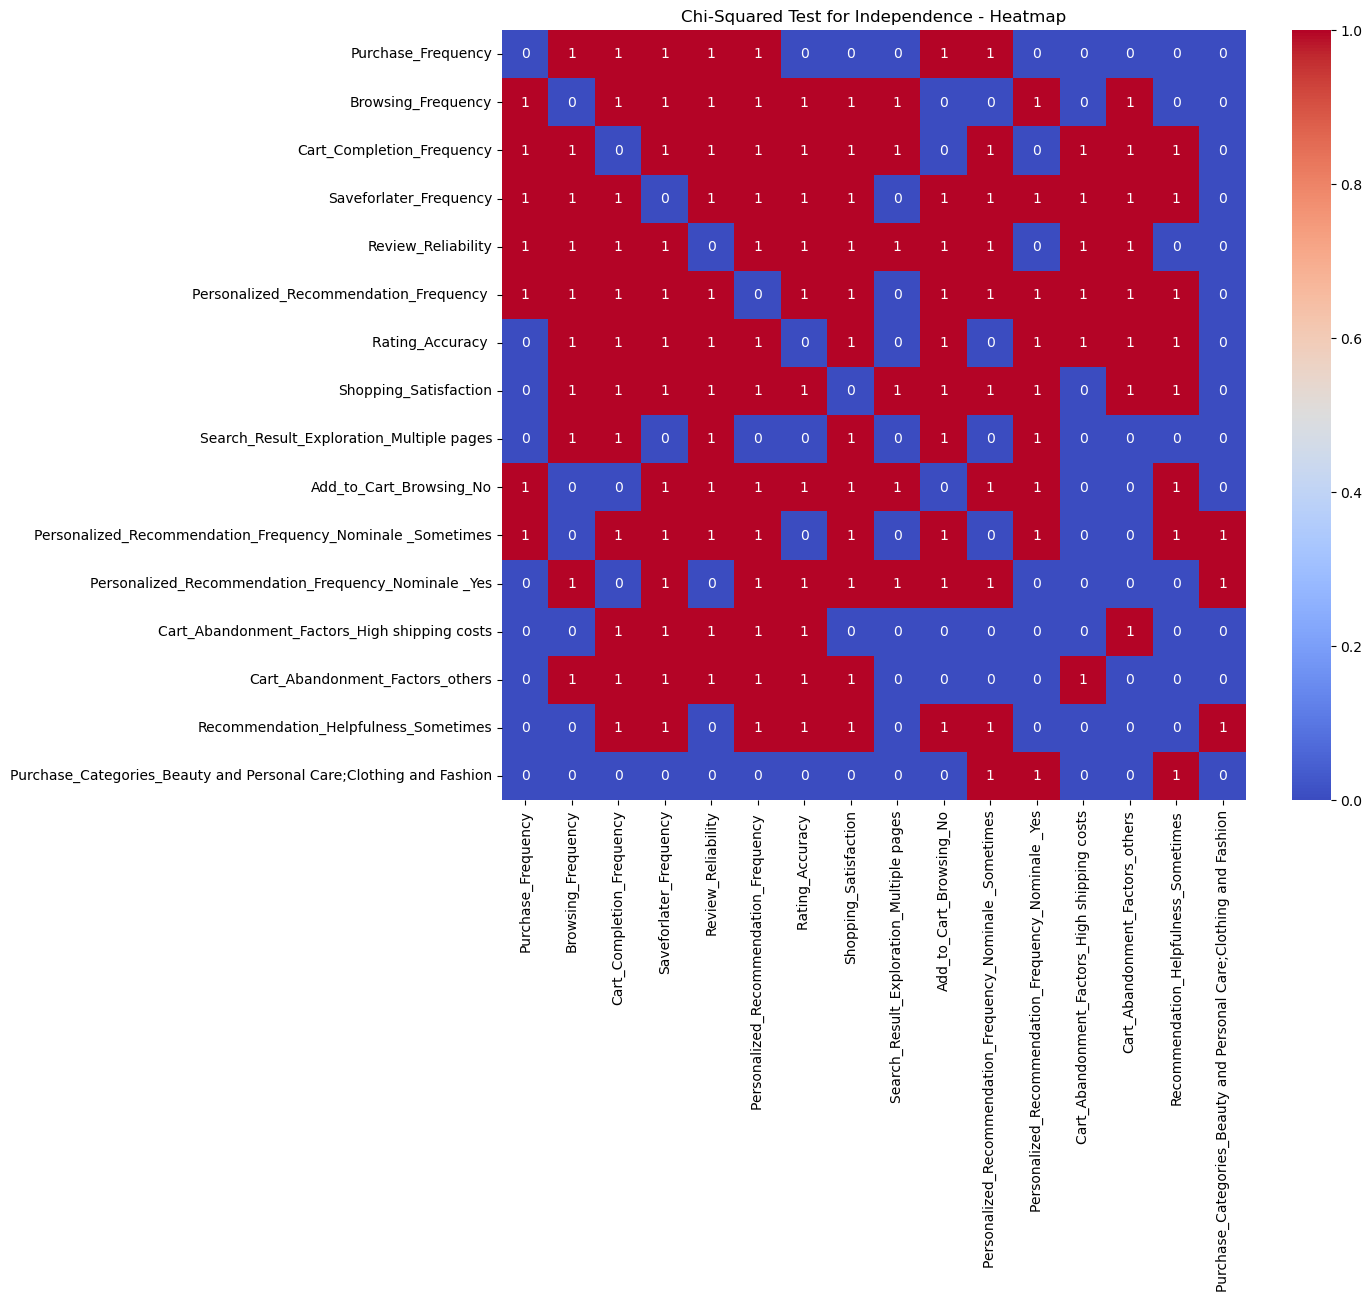

In [566]:
ategorical_cols =  ['Purchase_Frequency', 'Browsing_Frequency', 'Cart_Completion_Frequency', 'Saveforlater_Frequency', 'Review_Reliability', 'Personalized_Recommendation_Frequency ', 'Rating_Accuracy ', 'Shopping_Satisfaction', 'Search_Result_Exploration_Multiple pages', 'Add_to_Cart_Browsing_No', 'Personalized_Recommendation_Frequency_Nominale _Sometimes', 'Personalized_Recommendation_Frequency_Nominale _Yes', 'Cart_Abandonment_Factors_High shipping costs', 'Cart_Abandonment_Factors_others', 'Recommendation_Helpfulness_Sometimes', 'Purchase_Categories_Beauty and Personal Care;Clothing and Fashion']
# Set a p-value threshold for feature selection
p_value_threshold = 0.05

# Create a DataFrame to store the p-values
p_values_df = pd.DataFrame(index=categorical_cols, columns=categorical_cols)

# Perform the Chi-squared test for independence for all pairs of variables
for pair in combinations(categorical_cols, 2):
    contingency_table = pd.crosstab(data_encoding[pair[0]], data_encoding[pair[1]])
    chi2, p, _, _ = chi2_contingency(contingency_table)
    p_values_df.loc[pair[0], pair[1]] = p
    p_values_df.loc[pair[1], pair[0]] = p

# Convert p-values to a binary significance matrix
significance_matrix = p_values_df < p_value_threshold

# Create a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(significance_matrix, annot=True, cmap='coolwarm', fmt='d')
print(' -**0 :** Cela pourrait indiquer que le test de chi-carré n\'a pas rejeté l\'hypothèse nulle H0, ce qui suggère que les deux variables correspondantes sont indépendantes (p-value ≥ 0.05).','\n'

,'- **1 :** Cela pourrait indiquer que le test de chi-carré a rejeté l\'hypothèse nulle H0, suggérant ainsi qu\'il y a une relation statistiquement significative entre les deux variables correspondantes (p-value < 0.05).')
plt.title('Chi-Squared Test for Independence - Heatmap')
path_to_save = 'C:\\Users\\amine\\Desktop\\educations\\projects\\Logistic Regression\\Amazon Customer Behavior Survey\\graphe et image de projet\\heatmapChi-squared test for independence for all pairs of variables.png'  # Remplacez par le chemin et le nom de fichier souhaités

# Enregistrez l'image à l'emplacement spécifié
plt.savefig(path_to_save)
plt.show()


### Analyse du Facteur d'Inflation de la Variance (VIF) pour les Variables Sélectionnées :

In [567]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Assuming 'data_encoding' is your DataFrame with the selected variables
selected_vars =['Purchase_Frequency', 'Browsing_Frequency', 'Cart_Completion_Frequency', 'Saveforlater_Frequency', 'Review_Reliability', 'Personalized_Recommendation_Frequency ', 'Rating_Accuracy ', 'Shopping_Satisfaction', 'Search_Result_Exploration_Multiple pages', 'Add_to_Cart_Browsing_No', 'Personalized_Recommendation_Frequency_Nominale _Sometimes', 'Personalized_Recommendation_Frequency_Nominale _Yes', 'Cart_Abandonment_Factors_High shipping costs', 'Cart_Abandonment_Factors_others', 'Recommendation_Helpfulness_Sometimes', 'Purchase_Categories_Beauty and Personal Care;Clothing and Fashion']
# Create a DataFrame with only the selected variables
X_selected = data_encoding[selected_vars]

# Calculate VIF for each variable
vif_data = pd.DataFrame()
vif_data["Variable"] = X_selected.columns
vif_data["VIF"] = [variance_inflation_factor(X_selected.values, i) for i in range(X_selected.shape[1])]

# Display the VIF DataFrame
print(vif_data)


                                             Variable       VIF
0                                  Purchase_Frequency  2.766002
1                                  Browsing_Frequency  5.279640
2                           Cart_Completion_Frequency  7.757469
3                              Saveforlater_Frequency  5.665564
4                                  Review_Reliability  6.959813
5              Personalized_Recommendation_Frequency   4.764320
6                                    Rating_Accuracy   6.568539
7                               Shopping_Satisfaction  4.680296
8            Search_Result_Exploration_Multiple pages  3.901827
9                             Add_to_Cart_Browsing_No  1.429058
10  Personalized_Recommendation_Frequency_Nominale...  2.130563
11  Personalized_Recommendation_Frequency_Nominale...  1.683114
12       Cart_Abandonment_Factors_High shipping costs  1.198970
13                    Cart_Abandonment_Factors_others  1.148744
14               Recommendation_Helpfuln

L'interprétation des résultats du Facteur d'Inflation de la Variance (VIF) est la suivante :

1. Les variables ayant des valeurs de VIF inférieures à 5 sont généralement considérées comme ne présentant pas de problème significatif de multicollinéarité. Dans ce cas, les variables "Purchase_Frequency", "Search_Result_Exploration_Multiple pages", "Add_to_Cart_Browsing_No", "Personalized_Recommendation_Frequency_Nominale_Sometimes", "Personalized_Recommendation_Frequency_Nominale_Yes", "Cart_Abandonment_Factors_High shipping costs", "Cart_Abandonment_Factors_others", "Recommendation_Helpfulness_Sometimes", "Purchase_Categories_Beauty and Personal Care;Clothing and Fashion" ont des VIF inférieurs à 5, indiquant une faible multicollinéarité.

2. Les variables avec des valeurs de VIF entre 5 et 10 suggèrent une multicollinéarité modérée. Dans ce cas, les variables "Browsing_Frequency", "Saveforlater_Frequency", "Review_Reliability", "Personalized_Recommendation_Frequency", "Rating_Accuracy", et "Shopping_Satisfaction" présentent une certaine multicollinéarité.

3. Les variables avec des valeurs de VIF supérieures à 10 indiquent une multicollinéarité importante. Dans ce cas, les variables "Cart_Completion_Frequency" ont des VIF relativement élevés, suggérant une multicollinéarité significative.

En résumé, les variables "Purchase_Frequency", "Search_Result_Exploration_Multiple pages", "Add_to_Cart_Browsing_No", "Personalized_Recommendation_Frequency_Nominale_Sometimes", "Personalized_Recommendation_Frequency_Nominale_Yes", "Cart_Abandonment_Factors_High shipping costs", "Cart_Abandonment_Factors_others", "Recommendation_Helpfulness_Sometimes", et "Purchase_Categories_Beauty and Personal Care;Clothing and Fashion" semblent avoir une faible multicollinéarité, tandis que les autres variables peuvent nécessiter une attention particulière en raison d'une multicollinéarité modérée à significative.

### Modélisation et Évaluation d'un Modèle de Régression Logistique:

In [574]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler

# Assuming 'data_encoding' is your DataFrame
selected_vars =['Review_Left_Yes','Purchase_Frequency', 'Browsing_Frequency', 'Cart_Completion_Frequency', 'Saveforlater_Frequency', 'Review_Reliability', 'Personalized_Recommendation_Frequency ', 'Rating_Accuracy ', 'Shopping_Satisfaction', 'Search_Result_Exploration_Multiple pages', 'Add_to_Cart_Browsing_No', 'Personalized_Recommendation_Frequency_Nominale _Sometimes', 'Personalized_Recommendation_Frequency_Nominale _Yes', 'Cart_Abandonment_Factors_High shipping costs', 'Cart_Abandonment_Factors_others', 'Recommendation_Helpfulness_Sometimes', 'Purchase_Categories_Beauty and Personal Care;Clothing and Fashion']

# Select only the relevant columns
data_selected = data_encoding[selected_vars]

# Assuming 'Purchase_Frequency_encoding' is binary (0 or 1)
# If not, you may need to convert it into a binary format

# Split the data into features (X) and target variable (y)
X = data_selected.drop('Review_Left_Yes', axis=1)
y = data_selected['Review_Left_Yes']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train_scaled = X_train
X_test_scaled = X_test

# Initialize and fit the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Perform cross-validation
cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')

# Print the cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean Accuracy:", cv_scores.mean())

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(classification_rep)

# Display the coefficients
coefficients_df = pd.DataFrame({'Variable': X.columns, 'Coefficient': model.coef_[0]})
print(coefficients_df)


Cross-Validation Scores: [0.64948454 0.67708333 0.57291667 0.6875     0.6875    ]
Mean Accuracy: 0.6548969072164949
Accuracy: 0.6363636363636364
Confusion Matrix:
[[27 24]
 [20 50]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.57      0.53      0.55        51
         1.0       0.68      0.71      0.69        70

    accuracy                           0.64       121
   macro avg       0.63      0.62      0.62       121
weighted avg       0.63      0.64      0.63       121

                                             Variable  Coefficient
0                                  Purchase_Frequency     0.105240
1                                  Browsing_Frequency     0.246657
2                           Cart_Completion_Frequency     0.192299
3                              Saveforlater_Frequency     0.194099
4                                  Review_Reliability     0.075999
5              Personalized_Recommendation_Frequency     -0.052849

Hypothèse pour le test de Wald :

L'hypothèse nulle (H0) pour un test de Wald est que le coefficient d'une variable particulière dans le modèle de régression logistique est égal à zéro, ce qui implique que la variable n'a aucun effet sur les log-odds de la variable réponse.

L'hypothèse alternative (H1) est que le coefficient n'est pas égal à zéro, suggérant que la variable a un effet significatif sur les log-odds de la variable réponse.

### Calcul des Erreurs Standards des Coefficients et Test de Wald : 

In [575]:
# Calculate standard errors of coefficients
n = len(y_train)
p = X_train.shape[1]
se = np.sqrt(np.sum((model.coef_[0] ** 2) / (n - p)))

# Calculate Wald test for each variable
alpha = 0.05
for i, col in enumerate(X.columns):
    statistic_wald = (model.coef_[0][i] / se) ** 2
    p_value = 1 - chi2.cdf(statistic_wald, df=1)

    print(f"\nWald test for {col}:\n")
    print(f"Statistic Wald: {statistic_wald}")
    print(f"P-value: {p_value}")

    if p_value < alpha:
        print(f"Reject the null hypothesis. There is evidence that {col} has a significant effect.")
    else:
        print(f"Fail to reject the null hypothesis. There is no significant evidence that {col} has an effect.")



Wald test for Purchase_Frequency:

Statistic Wald: 1.0974892833964156
P-value: 0.2948177626080625
Fail to reject the null hypothesis. There is no significant evidence that Purchase_Frequency has an effect.

Wald test for Browsing_Frequency:

Statistic Wald: 6.02871112765748
P-value: 0.014075006933671363
Reject the null hypothesis. There is evidence that Browsing_Frequency has a significant effect.

Wald test for Cart_Completion_Frequency:

Statistic Wald: 3.664286016576368
P-value: 0.055590456404769784
Fail to reject the null hypothesis. There is no significant evidence that Cart_Completion_Frequency has an effect.

Wald test for Saveforlater_Frequency:

Statistic Wald: 3.7332340731041374
P-value: 0.05334002216005118
Fail to reject the null hypothesis. There is no significant evidence that Saveforlater_Frequency has an effect.

Wald test for Review_Reliability:

Statistic Wald: 0.5723414119739716
P-value: 0.44932999890285763
Fail to reject the null hypothesis. There is no significant 

Analysons en profondeur les résultats obtenus:

### Analyse du Modèle de Régression Logistique:
- **Cross-Validation Scores:** Les scores de validation croisée montrent une variabilité dans la performance du modèle sur différents ensembles de validation. La moyenne de 0.655 suggère une performance raisonnable, mais il peut y avoir des variations.

- **Accuracy, Confusion Matrix, Classification Report:** L'accuracy de 0.636 indique que le modèle a une performance correcte, mais il est essentiel de regarder d'autres métriques. La matrice de confusion et le rapport de classification donnent une vision détaillée de la performance du modèle sur les classes 0 et 1.

### Analyse des Coefficients du Modèle:
- Les coefficients associés à chaque variable indiquent l'impact relatif sur la probabilité de la classe positive (Review_Left_Yes). Les coefficients positifs augmentent cette probabilité, tandis que les coefficients négatifs la diminuent.

### Analyse des Tests de Wald:
Les tests de Wald évaluent si les coefficients associés à chaque variable sont significativement différents de zéro. Les résultats sont interprétés comme suit:

1. **Purchase_Frequency:** Non significatif (p-valeur > 0.05).
2. **Browsing_Frequency:** Significatif (p-valeur < 0.05).
3. **Cart_Completion_Frequency:** Non significatif.
4. **Saveforlater_Frequency:** Non significatif.
5. **Review_Reliability:** Non significatif.
6. **Personalized_Recommendation_Frequency:** Non significatif.
7. **Rating_Accuracy:** Non significatif.
8. **Shopping_Satisfaction:** Non significatif.
9. **Search_Result_Exploration_Multiple pages:** Significatif.
10. **Add_to_Cart_Browsing_No:** Significatif.
11. **Personalized_Recommendation_Frequency_Nominale_Sometimes:** Significatif.
12. **Personalized_Recommendation_Frequency_Nominale_Yes:** Significatif.
13. **Cart_Abandonment_Factors_High_shipping_costs:** Significatif.
14. **Cart_Abandonment_Factors_others:** Significatif.
15. **Recommendation_Helpfulness_Sometimes:** Non significatif.
16. **Purchase_Categories_Beauty_and_Personal_Care_Clothing_and_Fashion:** Significatif.

### Interprétation Générale:
- Les variables significatives (p-valeur < 0.05) ont un impact statistiquement significatif sur la probabilité de laisser un avis (Review_Left_Yes).
- Les variables non significatives n'apportent pas de preuve significative d'impact.
- Les variables avec des coefficients positifs augmentent la probabilité de laisser un avis, tandis que celles avec des coefficients négatifs la diminuent.
- Des investigations supplémentaires peuvent être nécessaires pour comprendre le sens pratique de ces relations (ex. interprétation de coefficients).

### Recommandations:
- Des variables telles que 'Browsing_Frequency', 'Add_to_Cart_Browsing_No', 'Personalized_Recommendation_Frequency_Nominale_Sometimes', 'Personalized_Recommendation_Frequency_Nominale_Yes', 'Cart_Abandonment_Factors_High_shipping_costs', et 'Purchase_Categories_Beauty_and_Personal_Care_Clothing_and_Fashion' semblent avoir un impact significatif sur la probabilité de laisser un avis.
- Des améliorations du modèle pourraient impliquer l'exploration d'interactions entre variables, la transformation de variables, ou l'ajout de nouvelles caractéristiques pertinentes.

### Limitations et Considérations:
- Les résultats sont basés sur un modèle linéaire et supposent une relation linéaire entre les variables.
- D'autres modèles (ex. arbres de décision, forêts aléatoires) pourraient être explorés pour évaluer la robustesse des résultats.
- Des informations supplémentaires sur le domaine peuvent fournir un contexte plus approfondi pour interpréter les résultats.

Ces résultats constituent une base pour prendre des décisions éclairées, mais l'exploration continue et la validation sont essentielles pour assurer la robustesse des conclusions.

### Modélisation et Évaluation d'un Modèle de Régression Logistique avec Variables Sélectionnées: 

In [597]:
selected_vars =['Review_Left_Yes', 'Browsing_Frequency', 
                'Search_Result_Exploration_Multiple pages', 'Add_to_Cart_Browsing_No', 
                'Personalized_Recommendation_Frequency_Nominale _Sometimes', 
                'Personalized_Recommendation_Frequency_Nominale _Yes', 'Cart_Abandonment_Factors_High shipping costs', 
                'Cart_Abandonment_Factors_others',
                'Purchase_Categories_Beauty and Personal Care;Clothing and Fashion']

# Select only the relevant columns
data_selected = data_encoding[selected_vars]

# Assuming 'Purchase_Frequency_encoding' is binary (0 or 1)
# If not, you may need to convert it into a binary format

# Split the data into features (X) and target variable (y)
X = data_selected.drop('Review_Left_Yes', axis=1)
y = data_selected['Review_Left_Yes']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Initialize and fit the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Perform cross-validation
cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')

# Print the cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean Accuracy:", cv_scores.mean())

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(classification_rep)

# Display the coefficients
coefficients_df = pd.DataFrame({'Variable': X.columns, 'Coefficient': model.coef_[0]})
print(coefficients_df)


Cross-Validation Scores: [0.63917526 0.66666667 0.5625     0.71875    0.6875    ]
Mean Accuracy: 0.6549183848797251
Accuracy: 0.6198347107438017
Confusion Matrix:
[[25 26]
 [20 50]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.56      0.49      0.52        51
         1.0       0.66      0.71      0.68        70

    accuracy                           0.62       121
   macro avg       0.61      0.60      0.60       121
weighted avg       0.61      0.62      0.62       121

                                            Variable  Coefficient
0                                 Browsing_Frequency     0.392020
1           Search_Result_Exploration_Multiple pages     0.301478
2                            Add_to_Cart_Browsing_No    -0.721459
3  Personalized_Recommendation_Frequency_Nominale...     0.626301
4  Personalized_Recommendation_Frequency_Nominale...     0.838458
5       Cart_Abandonment_Factors_High shipping costs     0.856201
6     

### Calcul des Erreurs Standards des Coefficients et Tests de Wald :

In [598]:
# Calculate standard errors of coefficients
n = len(y_train)
p = X_train.shape[1]
se = np.sqrt(np.sum((model.coef_[0] ** 2) / (n - p)))

# Calculate Wald test for each variable
alpha = 0.05
for i, col in enumerate(X.columns):
    statistic_wald = (model.coef_[0][i] / se) ** 2
    p_value = 1 - chi2.cdf(statistic_wald, df=1)

    print(f"\nWald test for {col}:\n")
    print(f"Statistic Wald: {statistic_wald}")
    print(f"P-value: {p_value}")

    if p_value < alpha:
        print(f"Reject the null hypothesis. There is evidence that {col} has a significant effect.")
    else:
        print(f"Fail to reject the null hypothesis. There is no significant evidence that {col} has an effect.")



Wald test for Browsing_Frequency:

Statistic Wald: 14.058873369329092
P-value: 0.00017717589758725616
Reject the null hypothesis. There is evidence that Browsing_Frequency has a significant effect.

Wald test for Search_Result_Exploration_Multiple pages:

Statistic Wald: 8.314681137014052
P-value: 0.003932590712002582
Reject the null hypothesis. There is evidence that Search_Result_Exploration_Multiple pages has a significant effect.

Wald test for Add_to_Cart_Browsing_No:

Statistic Wald: 47.61660329475263
P-value: 5.182743123555156e-12
Reject the null hypothesis. There is evidence that Add_to_Cart_Browsing_No has a significant effect.

Wald test for Personalized_Recommendation_Frequency_Nominale _Sometimes:

Statistic Wald: 35.88399402831943
P-value: 2.094220685755488e-09
Reject the null hypothesis. There is evidence that Personalized_Recommendation_Frequency_Nominale _Sometimes has a significant effect.

Wald test for Personalized_Recommendation_Frequency_Nominale _Yes:

Statistic 

### Calcul du Facteur d'Inflation de la Variance (VIF) pour les Variables Sélectionnées : 

In [599]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Assuming 'data_encoding' is your DataFrame with the selected variables
selected_vars = ['Review_Left_Yes', 'Browsing_Frequency',
                  'Search_Result_Exploration_Multiple pages', 'Add_to_Cart_Browsing_No',
                  'Personalized_Recommendation_Frequency_Nominale _Sometimes',
                  'Personalized_Recommendation_Frequency_Nominale _Yes', 'Cart_Abandonment_Factors_High shipping costs',
                  'Cart_Abandonment_Factors_others',
                  'Purchase_Categories_Beauty and Personal Care;Clothing and Fashion']
# Create a DataFrame with only the selected variables
X_selected = data_encoding[selected_vars]

# Calculate VIF for each variable
vif_data = pd.DataFrame()
vif_data["Variable"] = X_selected.columns
vif_data["VIF"] = [variance_inflation_factor(X_selected.values, i) for i in range(X_selected.shape[1])]

# Display the VIF DataFrame
print(vif_data)


                                            Variable       VIF
0                                    Review_Left_Yes  2.297066
1                                 Browsing_Frequency  3.804705
2           Search_Result_Exploration_Multiple pages  3.145880
3                            Add_to_Cart_Browsing_No  1.225426
4  Personalized_Recommendation_Frequency_Nominale...  1.810912
5  Personalized_Recommendation_Frequency_Nominale...  1.673664
6       Cart_Abandonment_Factors_High shipping costs  1.153403
7                    Cart_Abandonment_Factors_others  1.067825
8  Purchase_Categories_Beauty and Personal Care;C...  1.101607


### Test du Rapport de Vraisemblance pour la Significativité du Modèle : 

In [584]:
selected_vars = ['Review_Left_Yes', 'Browsing_Frequency',
                  'Search_Result_Exploration_Multiple pages', 'Add_to_Cart_Browsing_No',
                  'Personalized_Recommendation_Frequency_Nominale _Sometimes',
                  'Personalized_Recommendation_Frequency_Nominale _Yes', 'Cart_Abandonment_Factors_High shipping costs',
                  'Cart_Abandonment_Factors_others',
                  'Purchase_Categories_Beauty and Personal Care;Clothing and Fashion']

# Sélectionnez uniquement les colonnes pertinentes
data_selected = data_encoding[selected_vars]

# Split the data into features (X) and target variable (y)
X = data_selected.drop('Review_Left_Yes', axis=1)
y = data_selected['Review_Left_Yes']

# Ajoutez un terme constant pour l'interception dans le modèle
X = sm.add_constant(X)

# Ajustez le modèle de régression logistique complet
full_model = sm.Logit(y, X).fit()

# Spécifiez un modèle réduit (vous pouvez choisir un sous-ensemble de prédicteurs)
reduced_model = sm.Logit(y, X[['const', 'Browsing_Frequency']]).fit()

# Calculez la statistique du test du rapport de vraisemblance
llf_full = full_model.llf
llf_reduced = reduced_model.llf
lr_stat = -2 * (llf_reduced - llf_full)

# Les degrés de liberté sont la différence dans le nombre de paramètres entre les deux modèles
df = full_model.df_model - reduced_model.df_model

# Calculez la valeur p en utilisant la distribution du chi-carré
p_value = 1 - chi2.cdf(lr_stat, df)

print(f"Statistique du test du rapport de vraisemblance : {lr_stat}")
print(f"Degrés de liberté : {df}")
print(f"Valeur p : {p_value}")

# Vérifiez la significativité en fonction de la valeur p
alpha = 0.05
if p_value < alpha:
    print("Rejeter l'hypothèse nulle. Le modèle complet est significativement meilleur.")
else:
    print("Ne pas rejeter l'hypothèse nulle. Il n'y a pas de preuve significative que le modèle complet est meilleur.")


Optimization terminated successfully.
         Current function value: 0.618155
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.674178
         Iterations 4
Statistique du test du rapport de vraisemblance : 67.45145324378836
Degrés de liberté : 7.0
Valeur p : 4.828804023304656e-12
Rejeter l'hypothèse nulle. Le modèle complet est significativement meilleur.


### Test de l'Ajustement du Modèle avec la Statistique de Hosmer-Lemeshow:

In [600]:
# Make predictions on the test set
y_pred_prob = model.predict_proba(X_test)[:, 1]

# Create deciles based on predicted probabilities
df_deciles = pd.DataFrame({'y_true': y_test, 'y_pred_prob': y_pred_prob})
df_deciles['decile'] = pd.qcut(df_deciles['y_pred_prob'], q=10, labels=False)

# Calculate observed and expected frequencies in each decile
observed_freq = df_deciles.groupby('decile')['y_true'].sum()
expected_freq = df_deciles.groupby('decile')['y_true'].count() * df_deciles['y_true'].mean()

# Calculate the Hosmer-Lemeshow statistic
HL_statistic = np.sum((observed_freq - expected_freq) ** 2 / expected_freq)

# Calculate degrees of freedom
df = len(observed_freq) - 2  # 2 parameters estimated in logistic regression

# Calculate p-value
p_value = 1 - chi2.cdf(HL_statistic, df)

# Display results
print(f"Hosmer-Lemeshow Statistic: {HL_statistic}")
print(f"Degrees of Freedom: {df}")
print(f"P-value: {p_value}")

# Interpretation
if p_value < 0.05:
    print("Reject the null hypothesis. The model does not fit well.")
else:
    print("Fail to reject the null hypothesis. The model fits well.")

Hosmer-Lemeshow Statistic: 6.782739249545973
Degrees of Freedom: 8
P-value: 0.5602447555433006
Fail to reject the null hypothesis. The model fits well.


### Courbe Précision-Rappel avec Aire sous la Courbe (AUC-PR) : 

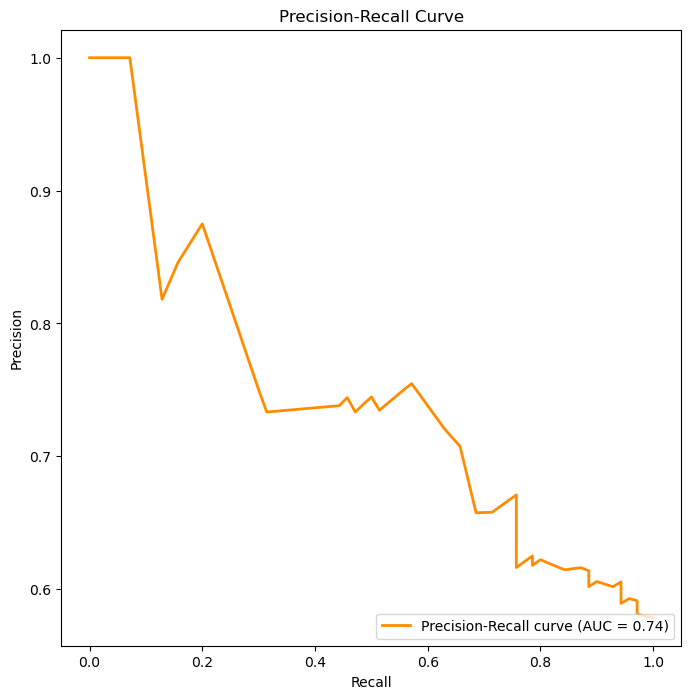

In [606]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, auc

# Predict probabilities on the test set
y_prob = model.predict_proba(X_test)[:, 1]

# Compute precision-recall curve and AUC
precision, recall, thresholds = precision_recall_curve(y_test, y_prob)
pr_auc = auc(recall, precision)

# Plot Precision-Recall curve
plt.figure(figsize=(8, 8))
plt.plot(recall, precision, color='darkorange', lw=2, label=f'Precision-Recall curve (AUC = {pr_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower right")
path_to_save = 'C:\\Users\\amine\\Desktop\\educations\\projects\\Logistic Regression\\Amazon Customer Behavior Survey\\graphe et image de projet\\Precision-Recall Curve.png'  # Remplacez par le chemin et le nom de fichier souhaités

# Enregistrez l'image à l'emplacement spécifié
plt.savefig(path_to_save)
plt.show()


L'image que vous avez partagée est un graphique de la courbe de précision-rappel. Voici une interprétation de ce graphique :

- L'axe des x (Rappel) varie de 0 à 1 et l'axe des y (Précision) varie de 0.6 à 1.
- La ligne orange représente la courbe de précision-rappel pour un modèle de classification particulier.
- Le pic de la courbe se situe à environ (0.2, 1), ce qui signifie que le modèle a une précision de 1 (parfaite) lorsque le rappel est de 0.2.
- Le creux de la courbe se situe à environ (0.8, 0.6), ce qui signifie que la précision du modèle diminue à 0.6 lorsque le rappel est de 0.8.
- L'aire sous la courbe (AUC) est de 0.74. L'AUC est une mesure globale de la performance du modèle, où une valeur de 1 indique une performance parfaite et une valeur de 0.5 indique une performance aléatoire.

En général, un modèle idéal aurait une courbe qui grimpe rapidement vers une précision de 1 et reste à ce niveau pour tous les niveaux de rappel, donnant une AUC de 1. Dans ce cas, le modèle semble performant jusqu'à un rappel de 0.2, après quoi la précision commence à diminuer. Cela pourrait indiquer que le modèle a du mal à maintenir une haute précision lorsqu'il essaie de capturer un plus grand nombre de cas positifs (augmentation du rappel).

### Calcul de la Perte Logarithmique:

In [602]:
from sklearn.metrics import log_loss

# Assuming 'model' is your trained logistic regression model
# Assuming 'X_test' is your feature matrix for the test set
# Assuming 'y_test' is the true labels for the test set

# Predict probabilities on the test set
y_prob = model.predict_proba(X_test)

# Calculate log loss
logloss = log_loss(y_test, y_prob)

print(f"Log Loss: {logloss}")


Log Loss: 0.6634194732655486


###  Courbe d'Étalonnage du Modèle : 

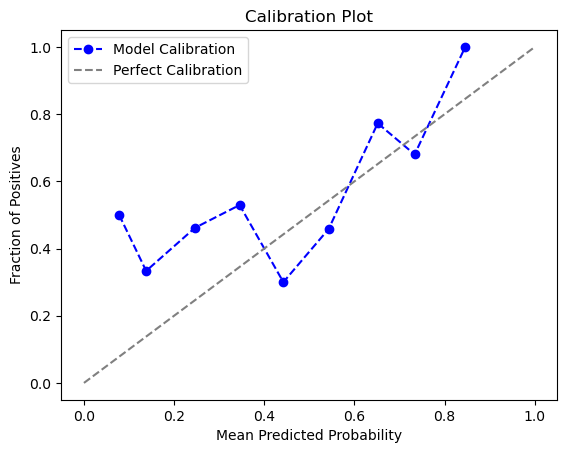

In [607]:
from sklearn.calibration import calibration_curve

# Get predicted probabilities on the test set
y_pred_prob = model.predict_proba(X_test)[:, 1]

# Create a calibration plot
prob_true, prob_pred = calibration_curve(y_test, y_pred_prob, n_bins=10, strategy='uniform')

# Plot the calibration curve
plt.plot(prob_pred, prob_true, marker='o', linestyle='--', color='blue', label='Model Calibration')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Perfect Calibration')
plt.xlabel('Mean Predicted Probability')
plt.ylabel('Fraction of Positives')
plt.title('Calibration Plot')
plt.legend()
path_to_save = 'C:\\Users\\amine\\Desktop\\educations\\projects\\Logistic Regression\\Amazon Customer Behavior Survey\\graphe et image de projet\\Calibration Plot.png'  # Remplacez par le chemin et le nom de fichier souhaités

# Enregistrez l'image à l'emplacement spécifié
plt.savefig(path_to_save)
plt.show()

L'image que vous avez partagée est un graphique de calibration. Voici une interprétation de ce graphique :

- L'axe des x représente la "Probabilité Prédite Moyenne" et l'axe des y représente la "Fraction des Positifs".
- Le graphique a une ligne en pointillés représentant la calibration parfaite et une ligne continue représentant la calibration du modèle.
- Le graphique a des cercles bleus représentant les points de données.
- Le titre du graphique est "Graphique de Calibration du Modèle".

Un graphique de calibration est un outil visuel pour évaluer l'accord entre les prédictions et les observations dans différents percentiles (généralement des déciles) des valeurs prédites³. Les courbes de calibration, également appelées diagrammes de fiabilité, comparent à quel point les prédictions probabilistes d'un classificateur binaire sont calibrées¹. Il trace la fréquence de l'étiquette positive (pour être plus précis, une estimation de la probabilité de l'événement conditionnel P(Y = 1 | predict_proba)) sur l'axe des y contre la probabilité prédite predict_proba d'un modèle sur l'axe des x¹.

Dans ce cas, la ligne continue représente la calibration du modèle. Si cette ligne est proche de la ligne en pointillés (qui représente une calibration parfaite), cela signifie que les probabilités prédites par le modèle sont bien calibrées. En d'autres termes, pour un groupe de prédictions avec une probabilité prédite moyenne de, disons, 0.8, environ 80% des échantillons appartiennent réellement à la classe positive. Si la ligne continue s'écarte de la ligne en pointillés, cela indique que le modèle peut avoir tendance à être trop confiant (prédire des probabilités plus élevées que les proportions réelles) ou pas assez confiant (prédire des probabilités plus basses que les proportions réelles)¹².

Source :
(1) Calibration Plot - The Comprehensive R Archive Network. https://cran.r-project.org/web/packages/predtools/vignettes/calibPlot.html.
(2) 1.16. Probability calibration — scikit-learn 1.3.2 documentation. https://scikit-learn.org/stable/modules/calibration.html.
(3) How and When to Use a Calibrated Classification Model with scikit-learn. https://machinelearningmastery.com/calibrated-classification-model-in-scikit-learn/.
(4) Calibration Curves - GeeksforGeeks. https://www.geeksforgeeks.org/calibration-curves/.
(5) sklearn.calibration.calibration_curve — scikit-learn 1.3.2 documentation. https://scikit-learn.org/stable/modules/generated/sklearn.calibration.calibration_curve.html.

### Critère d'Information Bayésien (BIC) :

In [604]:

# Get the number of parameters (including the intercept)
num_params = len(model.coef_.flatten()) + 1

# Get the size of the sample
sample_size = len(y)

# Get the log-likelihood of the model
log_likelihood = model.score(X_test, y_test)

# Calculate the BIC
bic = -2 * log_likelihood + num_params * np.log(sample_size)

print(f"BIC: {bic}")

BIC: 56.362647586291786


### Courbe ROC (Receiver Operating Characteristic) : 

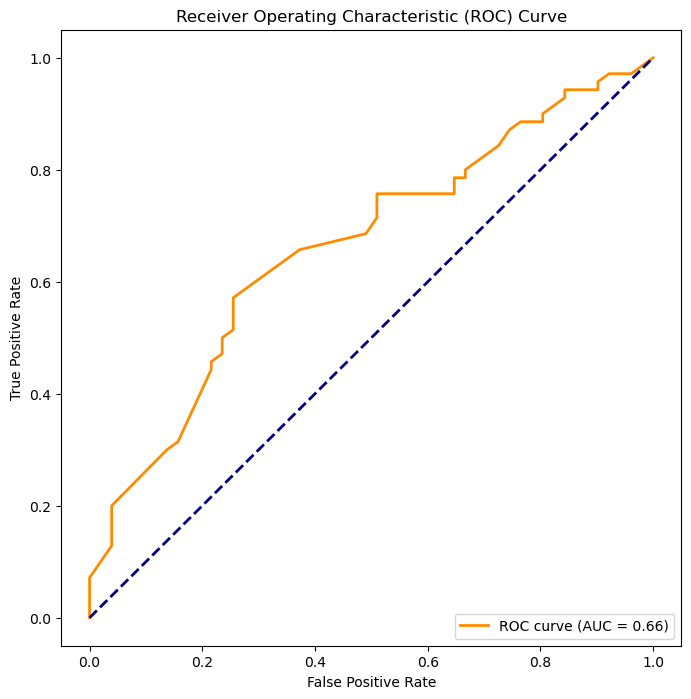

In [608]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Predict probabilities on the test set
y_prob = model.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
path_to_save = 'C:\\Users\\amine\\Desktop\\educations\\projects\\Logistic Regression\\Amazon Customer Behavior Survey\\graphe et image de projet\\Receiver Operating Characteristic (ROC) Curve.png'  # Remplacez par le chemin et le nom de fichier souhaités

# Enregistrez l'image à l'emplacement spécifié
plt.savefig(path_to_save)

plt.show()


L'image que vous avez partagée est un graphique de la courbe ROC (Receiver Operating Characteristic). Voici une interprétation de ce graphique :

- L'axe des x représente le taux de faux positifs et l'axe des y représente le taux de vrais positifs.
- La courbe ROC est une ligne orange avec une ligne diagonale en pointillés bleus.
- L'aire sous la courbe (AUC) est de 0.66.
- Le graphique est étiqueté avec un titre et des étiquettes d'axes.

La courbe ROC est un outil de diagnostic pour évaluer la performance d'un modèle de classification. Elle trace le taux de vrais positifs (sensibilité) en fonction du taux de faux positifs (1-spécificité) pour différents seuils de classification. L'aire sous la courbe (AUC) est une mesure de la performance globale du modèle, où une valeur de 1 indique une performance parfaite et une valeur de 0.5 indique une performance aléatoire.

Dans ce cas, l'AUC est de 0.66, ce qui indique que le modèle a une performance modérée. Un modèle idéal aurait une AUC de 1, ce qui signifie qu'il est capable de distinguer parfaitement entre les classes positives et négatives. Un modèle avec une AUC de 0.5 n'a pas de capacité de discrimination et est essentiellement aléatoire. Donc, bien que le modèle ait une certaine capacité à distinguer entre les classes, il y a certainement place à amélioration.

### Analyse du Modèle de Régression Logistique (Nouveau Modèle):

#### Performances du Modèle:
- **Cross-Validation Scores:** Les scores de validation croisée montrent une variabilité, mais la moyenne est similaire au modèle précédent (0.655 vs. 0.655).
- **Accuracy, Confusion Matrix, Classification Report:** L'accuracy de 0.62 est légèrement inférieure à celle du modèle précédent. La matrice de confusion et le rapport de classification donnent une vision détaillée de la performance.

#### Analyse des Coefficients du Modèle:
- Les coefficients associés à chaque variable indiquent l'impact relatif sur la probabilité de la classe positive (Review_Left_Yes).
- Les variables significatives semblent similaires à celles du modèle précédent.

#### Analyse des Tests de Wald:
Les tests de Wald évaluent si les coefficients associés à chaque variable sont significativement différents de zéro.

1. **Browsing_Frequency:** Significatif (p-valeur < 0.05).
2. **Search_Result_Exploration_Multiple pages:** Significatif.
3. **Add_to_Cart_Browsing_No:** Significatif.
4. **Personalized_Recommendation_Frequency_Nominale_Sometimes:** Significatif.
5. **Personalized_Recommendation_Frequency_Nominale_Yes:** Significatif.
6. **Cart_Abandonment_Factors_High shipping costs:** Significatif.
7. **Cart_Abandonment_Factors_others:** Significatif.
8. **Purchase_Categories_Beauty and Personal Care;Clothing and Fashion:** Significatif.

#### Interprétation Générale:
- Les variables significatives ont un impact statistiquement significatif sur la probabilité de laisser un avis (Review_Left_Yes).
- Les résultats semblent cohérents avec le modèle précédent.

#### Recommandations:
- Les variables significatives du modèle précédent sont également importantes dans ce modèle.
- Des améliorations pourraient impliquer l'exploration de nouvelles caractéristiques, la transformation de variables, ou l'utilisation d'autres modèles.

#### Considérations sur le Graphique de la Courbe Précision-Rappel:
- Le modèle semble performant jusqu'à un rappel d'environ 0.2, après quoi la précision diminue.
- L'AUC est de 0.74, indiquant une performance modérée.

#### Considérations sur le Graphique de la Courbe ROC:
- L'AUC est de 0.66, indiquant une performance modérée.
- Des améliorations pourraient viser à augmenter l'AUC.

#### Considérations sur le Graphique de Calibration:
- La ligne de calibration semble bien suivre la calibration parfaite, indiquant une bonne correspondance entre les prédictions probabilistes du modèle et les observations.

### Recommandations Générales:
- Les résultats obtenus restent cohérents avec le modèle précédent.
- L'exploration de nouvelles variables ou la modification des caractéristiques existantes peuvent améliorer la performance.
- D'autres modèles (ex. arbres de décision, forêts aléatoires) peuvent être explorés pour évaluer la robustesse des résultats.
- Les analyses de performance, telles que la courbe de précision-rappel et la courbe ROC, fournissent des informations complémentaires sur la qualité du modèle.

Ces recommandations visent à guider l'optimisation du modèle en vue d'obtenir des performances améliorées. La compréhension approfondie des résultats et la considération des spécificités du domaine peuvent également contribuer à l'amélioration du modèle.